# Documentation and Functions

In [1]:
# # Check required packages and dependencies:
# !pip freeze > requirements.txt

In [2]:
import os

# Measure Package 0: Baseline
menu_mp = 0
input_mp = 'baseline'

# Get the current working directory of the project
project_root = os.path.abspath(os.getcwd())
print(f"Project root directory: {project_root}")

# Relative path to the file from the project root
relative_path = r"tare_model_functions_v2.2.ipynb"

# Construct the absolute path to the file
file_path = os.path.join(project_root, relative_path)
print(f"File path: {file_path}")

# Run the notebook and import variables
if os.path.exists(relative_path):
    get_ipython().run_line_magic('run', f'-i "{relative_path}"')
    print("Loaded All TARE Model Functions")
else:
    print(f"File not found: {relative_path}")

Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_functions_v2.2.ipynb
Loaded All TARE Model Functions


In [3]:
from datetime import datetime

# Get the current datetime
# Start the timer
start_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from tabulate import tabulate

# Set the font for Matplotlib
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

# Set the font for Seaborn
sns.set(font='sans-serif', style='darkgrid')

In [5]:
pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [6]:
# Format the name of the exported results file using the location ID
from datetime import datetime
result_export_time = datetime.now()
results_export_formatted_date = result_export_time.strftime("%Y-%m-%d_%H-%M")

In [7]:
# Select whether to begin new run or visualize existing model outputs
while True:
    try:
        start_new_model_run = str(input("""
Would you like to begin a new simulation or visualize output results from a previous model run? Please enter one of the following:
Y. I'd like to start a new model run.
N. I'd like to visualize output results from a previous model run.""")).upper()

        if start_new_model_run == 'Y':
            model_run_date_time = results_export_formatted_date           
            print(f"Project root directory: {project_root}")

            # Relative path to the file from the project root
            relative_path = r"tare_model_run_simulation_v2.2.ipynb"

            # Construct the absolute path to the file
            file_path = os.path.join(project_root, relative_path)
            print(f"File path: {file_path}")

            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(project_root, r"output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")
            save_figure_directory = str(output_folder_path)

            # Run the notebook and import variables
            if os.path.exists(relative_path):
                get_ipython().run_line_magic('run', f'-i "{relative_path}"')
            else:
                print(f"File not found: {relative_path}")

            break  # Exit the loop if input is 'Y'
            
        elif start_new_model_run == 'N':
            # Enter the date time of the model run in the following format: YYYY-MM-DD_HH-MM
            model_run_date_time = str(input("Enter the date time of the model run in the following format YYYY-MM-DD_HH-MM: "))
            print(f"Project root directory: {project_root}")
            
            # Storing Result Outputs in output_results folder
            relative_path = r"output_results"
            output_folder_path = os.path.join(project_root, relative_path)
            print(f"Result outputs will be exported here: {output_folder_path}")

            save_figure_directory = str(output_folder_path)
            
            break  # Exit the loop if input is 'N'
        
        else:
            print("Invalid input. Please enter 'Y' or 'N'.")
    
    except Exception as e:
        print("Invalid input. Please try again.")

Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_run_simulation_v2.2.ipynb
Result outputs will be exported here: c:\Users\14128\Research\cmu-tare-model\output_results
Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_scenario_baseline_v2.2.ipynb
Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_functions_v2.2.ipynb
Loaded All TARE Model Functions
Result outputs will be exported here: c:\Users\14128\Research\cmu-tare-model\output_results

-------------------------------------------------------------------------------------------------------
Welcome to the Trade-off Analysis of residential Retrofits for energy Equity Tool (TARE Model)
Let's start by reading the data from the NREL EUSS Database.

Make sure that the zipped folders stay organized as they are once unzipped

c:\Users\14128\anaconda3\Lib\site-packages\nbformat\__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


You chose to analyze all of the United States.

-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Advanced-BAU:
Advanced Retrofit: Measure Package 10
BAU Costs
Current Electricity Grid
-------------------------------------------------------------------------------------------------------

Retrieved data for filename: upgrade10_metadata_and_annual_results.csv
Located at filepath: c:\Users\14128\Research\cmu-tare-model\euss_data\\resstock_amy2018_release_1.1\\state\upgrade10_metadata_and_annual_results.csv


You chose to analyze all of the United States.

-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------


-----

# Baseline Scenario

### Convert Results Output CSVs to Dataframes

In [8]:
# def load_scenario_data(end_use, output_folder_path, scenario_string, model_run_date_time, columns_to_string):
#     # Construct the output folder path with the scenario of interest
#     scenario_folder_path = os.path.join(output_folder_path, scenario_string)
#     print(f"Output Results Folder Path: {scenario_folder_path}")

#     # List all files in the specified folder with the specified date in the filename
#     files = [f for f in os.listdir(scenario_folder_path) if os.path.isfile(os.path.join(scenario_folder_path, f)) and model_run_date_time in f]

#     # Initialize dataframe as None
#     df_outputs = None

#     # Assume there is one main file per scenario that includes all necessary data
#     if files:
#         file_path = os.path.join(scenario_folder_path, files[0])  # Assumes the first file is the correct one

#         if os.path.exists(file_path):
#             df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)
#             print(f"Loaded {end_use} data for Scenario '{scenario_string}'", "\n")
#         else:
#             print("File not found for the specified scenario", "\n")

#     if df_outputs is None:
#         print(f"No {end_use} data found for Scenario '{scenario_string}'")

#     return df_outputs

In [9]:
# Baseline
# load_scenario_data(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'baseline'

df_outputs_baseline_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string=None)
df_outputs_baseline_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string=None)
df_outputs_baseline_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string=None)
df_outputs_baseline_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string=None)
df_outputs_baseline_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string=None)

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline
Loaded Whole-Home data for Scenario 'baseline' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline
Loaded Heating data for Scenario 'baseline' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline
Loaded Water Heating data for Scenario 'baseline' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline
Loaded Clothes Drying data for Scenario 'baseline' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\baseline
Loaded Cooking data for Scenario 'baseline' 



In [10]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_baseline_heating['end_use'] = 'heating'
df_outputs_baseline_heating['base_fuel'] = df_outputs_baseline_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_baseline_waterHeating['end_use'] = 'waterHeating'
df_outputs_baseline_waterHeating['base_fuel'] = df_outputs_baseline_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_baseline_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_baseline_clothesDrying['base_fuel'] = df_outputs_baseline_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_baseline_cooking['end_use'] = 'cooking'
df_outputs_baseline_cooking['base_fuel'] = df_outputs_baseline_home['base_cooking_fuel']

# Energy Efficiency Retrofit Scenarios

In [11]:
print("--------------------------------------------------------------")
print("""
Scenarios for Basic, Moderate, and Advanced Retrofit

Basic Retrofit Scenarios
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic-BAU: Basic Retrofit (MP8), BAU Costs, Current Electricity Grid
    - Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic-IRA-Decarb: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

Moderate Retrofit Scenarios
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate-BAU: Moderate Retrofit (MP9), BAU Costs, Current Electricity Grid
    - Moderate-IRA: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate-IRA-Decarb: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
    
Advanced Retrofit Scenarios
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced-BAU: Advanced Retrofit (MP10), BAU Costs, Current Electricity Grid
    - Advanced-IRA: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced-IRA-Decarb: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid

Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.""")
print("--------------------------------------------------------------")
print("\n")

--------------------------------------------------------------

Scenarios for Basic, Moderate, and Advanced Retrofit

Basic Retrofit Scenarios
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic-BAU: Basic Retrofit (MP8), BAU Costs, Current Electricity Grid
    - Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic-IRA-Decarb: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

Moderate Retrofit Scenarios
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate-BAU: Moderate Retrofit (MP9), BAU Costs, Current Electricity Grid
    - Moderate-IRA: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate-IRA-Decarb: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
    
Advanced Retrofit Scenarios
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced-BAU: Advanced Retrofit (M

# Basic Retrofit Scenarios: Basic-BAU, Basic-IRA, Basic-IRA-Decarb

## Model Run Calculations

In [12]:
print("--------------------------------------------------------------")
print("""
Basic Retrofit Scenarios
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic-BAU: Basic Retrofit (MP8), BAU Costs, Current Electricity Grid
    - Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic-IRA-Decarb: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.""")
print("--------------------------------------------------------------")
print("\n")

--------------------------------------------------------------

Basic Retrofit Scenarios
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic-BAU: Basic Retrofit (MP8), BAU Costs, Current Electricity Grid
    - Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic-IRA-Decarb: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
--------------------------------------------------------------




In [13]:
# cost_assumption='reference'

In [14]:
# df_euss_am_baseline_home

In [15]:
# df_euss_am_mp8_home

## Convert Results Output CSVs to Dataframes

In [16]:
# MP8: 'retrofit_basic'
# load_scenario_data(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_basic'
menu_mp = 8

df_outputs_basic_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})
df_outputs_basic_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})
df_outputs_basic_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})
df_outputs_basic_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})
df_outputs_basic_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Whole-Home data for Scenario 'retrofit_basic' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Heating data for Scenario 'retrofit_basic' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Water Heating data for Scenario 'retrofit_basic' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Clothes Drying data for Scenario 'retrofit_basic' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_basic


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Cooking data for Scenario 'retrofit_basic' 



In [17]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_basic_heating['end_use'] = 'heating'
df_outputs_basic_heating['base_fuel'] = df_outputs_basic_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_basic_waterHeating['end_use'] = 'waterHeating'
df_outputs_basic_waterHeating['base_fuel'] = df_outputs_basic_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_basic_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_basic_clothesDrying['base_fuel'] = df_outputs_basic_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_basic_cooking['end_use'] = 'cooking'
df_outputs_basic_cooking['base_fuel'] = df_outputs_basic_home['base_cooking_fuel']

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Basic Retrofit (MP8)

In [18]:
# End-use category
category = 'heating'

# Annual/One-Time Metrics Summary Stats
df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_basic_home['baseline_heating_damages_climate'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_climate']
df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_basic_home['baseline_heating_damages_health'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_health']

summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_reduction_consumption',
                          f'mp{menu_mp}_{category}_reduction_damages_health',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
                          f'mp{menu_mp}_{category}_reduction_damages_climate',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
                          f'mp{menu_mp}_{category}_savings_fuelCost',
                          f'mp{menu_mp}_{category}_net_capitalCost',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost',                          
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Decarb Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} BAU Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} BAU Reduction in Annual Climate Damages [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Decarb Reduction in Annual Climate Damages [$USD]',
                          f'mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
                          f'mp{menu_mp}_{category}_net_capitalCost': f'BAU MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 Annual Energy Savings [kWh],MP8 BAU Reduction in Annual Health Damages [$USD],MP8 IRA-Decarb Reduction in Annual Health Damages [$USD],MP8 BAU Reduction in Annual Climate Damages [$USD],MP8 IRA-Decarb Reduction in Annual Climate Damages [$USD],MP8 Annual Fuel Savings [$USD],BAU MP8 Heating Net Equipment Capital Cost [$USD],IRA MP8 Heating Net Equipment Capital Cost [$USD]
count,269104.00,268651.00,267932.00,269134.00,268462.00,269113.00,270018.00,270018.00
mean,14697.11,82.63,155.70,619.70,920.66,596.40,19581.62,14893.40
std,15518.86,300.92,321.21,805.06,995.44,907.19,10272.25,11292.77
min,-1841.36,-907.17,-4.32,-2509.56,-49.85,-1052.78,-536.27,-7474.17
25%,3023.32,-19.24,14.20,149.40,270.31,93.03,12822.79,6982.02
50%,10146.70,6.28,55.75,378.55,661.00,276.97,17545.79,13036.62
75%,21362.90,81.96,158.99,781.72,1231.80,699.76,23956.93,20259.47
max,310456.05,8748.75,9964.15,23683.61,27908.24,20213.93,229592.91,221592.91


In [19]:
# End-use category
category = 'heating'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_public_npv',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv',
                          f'mp{menu_mp}_{category}_private_npv',
                          f'ira_mp{menu_mp}_{category}_private_npv',
                          f'mp{menu_mp}_{category}_net_npv',
                          f'ira_mp{menu_mp}_{category}_net_npv',
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv'
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} BAU Heating Public NPV [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Decarb Heating Public NPV [$USD]',                          
                          f'mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} BAU Heating Private NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
                          f'mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} BAU Heating Net NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA-Decarb Heating Net NPV [$USD]',                                                   
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 BAU Heating Public NPV [$USD],MP8 IRA-Decarb Heating Public NPV [$USD],MP8 BAU Heating Private NPV [$USD],MP8 IRA Heating Private NPV [$USD],MP8 BAU Heating Net NPV [$USD],MP8 IRA Heating Net NPV [$USD],MP8 IRA-Decarb Heating Net NPV [$USD]
count,269136.00,268487.00,270018.00,270018.00,270018.00,270018.00,269347.00
mean,6395.36,8529.91,-14167.88,-9479.66,-7793.40,-3105.19,-991.27
std,9472.98,10647.74,11617.71,12469.15,17592.43,18104.72,18420.43
min,-26728.45,-1582.25,-205393.36,-202638.93,-181489.26,-181489.26,-155101.68
25%,1304.71,2214.75,-19745.94,-16031.96,-16325.62,-12467.45,-10597.20
50%,3437.64,5533.69,-13656.46,-8729.56,-10404.29,-5124.71,-3484.76
75%,7594.47,10854.85,-8199.35,-2471.99,-3563.62,2223.38,4050.69
max,256400.80,284050.22,134831.45,134831.45,337078.83,337078.83,362850.30


In [20]:
filter_fuel = ['Electricity' ]
df_test_fuel = df_outputs_basic_heating[df_outputs_basic_heating['base_fuel'].isin(filter_fuel)]
df_test_fuel

,bldg_id,square_footage,census_region,building_america_climate_zone,cambium_GEA_region,state,city,county,puma,county_and_puma,weather_file_city,Longitude,Latitude,building_type,income,federal_poverty_level,occupancy,tenure,vacancy_status,base_heating_fuel,heating_type,hvac_cooling_type,vintage,base_heating_efficiency,base_electricity_heating_consumption,base_fuelOil_heating_consumption,base_naturalGas_heating_consumption,base_propane_heating_consumption,base_waterHeating_fuel,waterHeating_type,base_electricity_waterHeating_consumption,base_fuelOil_waterHeating_consumption,base_naturalGas_waterHeating_consumption,base_propane_waterHeating_consumption,base_clothesDrying_fuel,base_electricity_clothesDrying_consumption,base_naturalGas_clothesDrying_consumption,base_propane_clothesDrying_consumption,base_cooking_fuel,base_electricity_cooking_consumption,base_naturalGas_cooking_consumption,base_propane_cooking_consumption,baseline_heating_consumption,baseline_waterHeating_consumption,baseline_clothesDrying_consumption,baseline_cooking_consumption,subregion_eGRID,naturalGas_leakage_factor,margSocialCosts_so2,margDamage_factor_so2,margSocialCosts_nox,margDamage_factor_nox,margSocialCosts_pm25,margDamage_factor_pm25,margSocialCosts_co2,margDamage_factor_co2,electricity_lookup_values,baseline_heating_damages_so2,baseline_heating_damages_nox,baseline_heating_damages_pm25,baseline_heating_damages_co2,baseline_heating_damages_health,baseline_heating_damages_climate,baseline_waterHeating_damages_so2,baseline_waterHeating_damages_nox,baseline_waterHeating_damages_pm25,baseline_waterHeating_damages_co2,baseline_waterHeating_damages_health,baseline_waterHeating_damages_climate,baseline_clothesDrying_damages_so2,baseline_clothesDrying_damages_nox,baseline_clothesDrying_damages_pm25,baseline_clothesDrying_damages_co2,baseline_clothesDrying_damages_health,baseline_clothesDrying_damages_climate,baseline_cooking_damages_so2,baseline_cooking_damages_nox,baseline_cooking_damages_pm25,baseline_cooking_damages_co2,baseline_cooking_damages_health,baseline_cooking_damages_climate,region_merge,fuel_type_heating,fuel_type_waterHeating,fuel_type_clothesDrying,fuel_type_cooking,fuelPrice_electricity_perkWh,fuelPrice_naturalGas_perkWh,fuelPrice_propane_perkWh,fuelPrice_fuelOil_perkWh,baseline_heating_fuelCost,baseline_waterHeating_fuelCost,baseline_clothesDrying_fuelCost,baseline_cooking_fuelCost,hvac_has_ducts,baseline_heating_type,hvac_heating_efficiency,hvac_heating_type_and_fuel,size_heat_pump_backup_primary_k_btu_h,size_heating_system_primary_k_btu_h,size_heating_system_secondary_k_btu_h,upgrade_hvac_heating_efficiency,water_heater_efficiency,water_heater_fuel,water_heater_in_unit,size_water_heater_gal,upgrade_water_heater_efficiency,clothes_dryer_in_unit,upgrade_clothes_dryer,cooking_range_in_unit,upgrade_cooking_range,mp8_heating_consumption,mp8_waterHeating_consumption,mp8_clothesDrying_consumption,mp8_cooking_consumption,mp8_heating_reduction_consumption,mp8_heating_change_consumption,mp8_heating_percentChange_consumption,mp8_waterHeating_reduction_consumption,mp8_waterHeating_change_consumption,mp8_waterHeating_percentChange_consumption,mp8_clothesDrying_reduction_consumption,mp8_clothesDrying_change_consumption,mp8_clothesDrying_percentChange_consumption,mp8_cooking_reduction_consumption,mp8_cooking_change_consumption,mp8_cooking_percentChange_consumption,mp8_heating_damages_so2,mp8_heating_reduction_damages_so2,mp8_heating_damages_nox,mp8_heating_reduction_damages_nox,mp8_heating_damages_pm25,mp8_heating_reduction_damages_pm25,mp8_heating_damages_co2,mp8_heating_reduction_damages_co2,mp8_heating_damages_health,mp8_heating_damages_climate,mp8_heating_reduction_damages_health,mp8_heating_reduction_damages_climate,mp8_waterHeating_damages_so2,mp8_waterHeating_reduction_damages_so2,mp8_waterHeating_damages_nox,mp8_waterHeating_reduction_damages_nox,mp8_waterHeating_damages_pm25,mp8_waterHeating_reduction_damages_pm25,mp8_waterHeating_damages_co2,mp8_w

In [21]:
# End-use category
category = 'heating'

# Lifetime Summary Stats
summarize_stats_table(df=df_test_fuel,
                      data_columns=[                        
                          f'mp{menu_mp}_{category}_public_npv',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv',
                          f'mp{menu_mp}_{category}_private_npv',
                          f'ira_mp{menu_mp}_{category}_private_npv',
                          f'mp{menu_mp}_{category}_net_npv',
                          f'ira_mp{menu_mp}_{category}_net_npv',
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv'
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} BAU Heating Public NPV [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Decarb Heating Public NPV [$USD]',                          
                          f'mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} BAU Heating Private NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
                          f'mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} BAU Heating Net NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA-Decarb Heating Net NPV [$USD]',                                                   
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 BAU Heating Public NPV [$USD],MP8 IRA-Decarb Heating Public NPV [$USD],MP8 BAU Heating Private NPV [$USD],MP8 IRA Heating Private NPV [$USD],MP8 BAU Heating Net NPV [$USD],MP8 IRA Heating Net NPV [$USD],MP8 IRA-Decarb Heating Net NPV [$USD]
count,96609.00,96537.00,97086.00,97086.00,97086.00,97086.00,97002.00
mean,9570.50,10958.83,-7972.64,-3320.95,1550.83,6202.52,7581.04
std,13734.60,15105.39,10240.56,11078.99,21650.05,21993.89,23185.66
min,-26728.45,-212.12,-104189.26,-96189.26,-91566.40,-84289.95,-84156.13
25%,1221.28,1645.33,-13486.78,-9824.15,-10585.56,-6293.47,-5571.77
50%,4472.90,5616.14,-9021.01,-3711.32,-4997.44,592.85,1466.34
75%,12331.11,14069.73,-3916.74,1936.54,6590.43,11745.58,13298.62
max,256400.80,284050.22,134831.45,134831.45,337078.83,337078.83,362850.30


In [22]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [23]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

### Water Heating

In [24]:
# End-use category
category = 'waterHeating'

# Annual/One-Time Metrics Summary Stats
df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_basic_home['baseline_waterHeating_damages_climate'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_climate']
df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_basic_home['baseline_waterHeating_damages_health'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_health']

summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_reduction_consumption',
                          f'mp{menu_mp}_{category}_reduction_damages_health',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
                          f'mp{menu_mp}_{category}_reduction_damages_climate',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
                          f'mp{menu_mp}_{category}_savings_fuelCost',
                          f'mp{menu_mp}_{category}_net_capitalCost',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost',                          
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Decarb Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} BAU Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} BAU Reduction in Annual Climate Damages [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Decarb Reduction in Annual Climate Damages [$USD]',
                          f'mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
                          f'mp{menu_mp}_{category}_net_capitalCost': f'BAU MP{menu_mp} Water Heating Net Equipment Capital Cost [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Water Heating Net Equipment Capital Cost [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 Annual Energy Savings [kWh],MP8 BAU Reduction in Annual Health Damages [$USD],MP8 IRA-Decarb Reduction in Annual Health Damages [$USD],MP8 BAU Reduction in Annual Climate Damages [$USD],MP8 IRA-Decarb Reduction in Annual Climate Damages [$USD],MP8 Annual Fuel Savings [$USD],BAU MP8 Water Heating Net Equipment Capital Cost [$USD],IRA MP8 Water Heating Net Equipment Capital Cost [$USD]
count,270017.00,269948.00,269337.00,270018.00,269347.00,270013.00,270016.00,270016.00
mean,3136.40,27.55,42.22,164.25,233.88,153.35,1377.58,468.33
std,2114.18,65.01,70.07,150.68,182.17,173.74,641.83,975.11
min,-3.52,-251.96,-2.84,-585.71,19.13,-640.66,-2380.00,-2834.45
25%,1687.80,-3.52,7.33,76.44,122.45,45.44,970.05,-258.18
50%,2672.52,8.79,18.57,113.08,176.13,93.12,1360.95,340.61
75%,3963.20,34.62,45.49,191.80,275.99,197.92,1771.28,1207.58
max,23741.98,1366.56,1475.85,2610.67,3674.86,3339.21,7403.25,7403.25


In [25]:
# End-use category
category = 'waterHeating'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_public_npv',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv',
                          f'mp{menu_mp}_{category}_private_npv',
                          f'ira_mp{menu_mp}_{category}_private_npv',
                          f'mp{menu_mp}_{category}_net_npv',
                          f'ira_mp{menu_mp}_{category}_net_npv',
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv'
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} BAU Water Heating Public NPV [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Decarb Water Heating Public NPV [$USD]',                          
                          f'mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} BAU Water Heating Private NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Water Heating Private NPV [$USD]',
                          f'mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} BAU Water Heating Net NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA Water Heating Net NPV [$USD]',                          
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA-Decarb Water Heating Net NPV [$USD]',                                                   
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 BAU Water Heating Public NPV [$USD],MP8 IRA-Decarb Water Heating Public NPV [$USD],MP8 BAU Water Heating Private NPV [$USD],MP8 IRA Water Heating Private NPV [$USD],MP8 BAU Water Heating Net NPV [$USD],MP8 IRA Water Heating Net NPV [$USD],MP8 IRA-Decarb Water Heating Net NPV [$USD]
count,270018.00,269347.00,270014.00,270015.00,270015.00,270015.00,269345.00
mean,1523.33,1893.47,-159.61,749.64,1363.73,2272.98,2641.33
std,1622.26,1777.33,1370.20,1498.73,2757.36,2785.20,2925.55
min,-6653.35,-356.47,-7514.85,-7514.85,-14168.20,-14168.20,-7849.69
25%,596.36,870.99,-948.79,-184.96,-198.33,747.18,1034.08
50%,956.93,1299.20,-474.26,636.19,500.83,1587.06,1897.26
75%,1781.62,2193.66,225.99,1347.51,1904.03,2890.46,3278.10
max,24696.19,29080.56,24297.37,25915.77,38489.62,39902.52,42687.26


In [26]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='waterHeating',
#                            upgrade_column='upgrade_water_heater_efficiency'
#                           )

In [27]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='waterHeating',
#                                upgrade_column='upgrade_water_heater_efficiency'
#                               )

### Clothes Drying

In [28]:
# End-use category
category = 'clothesDrying'

# Annual/One-Time Metrics Summary Stats
df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_basic_home['baseline_clothesDrying_damages_climate'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_climate']
df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_basic_home['baseline_clothesDrying_damages_health'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_health']

summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_reduction_consumption',
                          f'mp{menu_mp}_{category}_reduction_damages_health',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
                          f'mp{menu_mp}_{category}_reduction_damages_climate',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
                          f'mp{menu_mp}_{category}_savings_fuelCost',
                          f'mp{menu_mp}_{category}_net_capitalCost',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost',                          
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Decarb Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} BAU Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} BAU Reduction in Annual Climate Damages [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Decarb Reduction in Annual Climate Damages [$USD]',
                          f'mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
                          f'mp{menu_mp}_{category}_net_capitalCost': f'BAU MP{menu_mp} Clothes Drying Net Equipment Capital Cost [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Clothes Drying Net Equipment Capital Cost [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 Annual Energy Savings [kWh],MP8 BAU Reduction in Annual Health Damages [$USD],MP8 IRA-Decarb Reduction in Annual Health Damages [$USD],MP8 BAU Reduction in Annual Climate Damages [$USD],MP8 IRA-Decarb Reduction in Annual Climate Damages [$USD],MP8 Annual Fuel Savings [$USD],BAU MP8 Clothes Drying Net Equipment Capital Cost [$USD],IRA MP8 Clothes Drying Net Equipment Capital Cost [$USD]
count,270016.00,269807.00,269336.00,270018.00,269347.00,270016.00,270016.00,270013.00
mean,346.97,9.40,15.39,28.24,57.83,27.73,963.80,479.63
std,206.50,14.08,16.93,27.32,38.61,35.63,503.63,625.94
min,103.16,-45.58,-0.64,-128.36,7.35,-173.46,-1556.77,-1572.85
25%,201.93,1.59,4.75,11.57,30.85,15.19,627.15,-0.63
50%,302.75,6.01,9.92,25.19,47.74,28.81,956.30,436.68
75%,439.90,13.52,19.92,41.75,73.75,45.89,1291.24,913.51
max,2633.54,235.36,296.00,355.93,479.69,339.79,4770.38,4528.75


In [29]:
# End-use category
category = 'clothesDrying'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_public_npv',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv',
                          f'mp{menu_mp}_{category}_private_npv',
                          f'ira_mp{menu_mp}_{category}_private_npv',
                          f'mp{menu_mp}_{category}_net_npv',
                          f'ira_mp{menu_mp}_{category}_net_npv',
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv'
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} BAU Clothes Drying Public NPV [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Decarb Clothes Drying Public NPV [$USD]',                          
                          f'mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} BAU Clothes Drying Private NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Clothes Drying Private NPV [$USD]',
                          f'mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} BAU Clothes Drying Net NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA Clothes Drying Net NPV [$USD]',                          
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA-Decarb Clothes Drying Net NPV [$USD]',                                                   
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 BAU Clothes Drying Public NPV [$USD],MP8 IRA-Decarb Clothes Drying Public NPV [$USD],MP8 BAU Clothes Drying Private NPV [$USD],MP8 IRA Clothes Drying Private NPV [$USD],MP8 BAU Clothes Drying Net NPV [$USD],MP8 IRA Clothes Drying Net NPV [$USD],MP8 IRA-Decarb Clothes Drying Net NPV [$USD]
count,269991.00,269347.00,270014.00,270014.00,270017.00,270017.00,269347.00
mean,314.55,484.42,-732.08,-247.91,-417.56,66.61,236.42
std,318.06,381.64,536.78,643.37,697.06,771.49,807.00
min,-1254.48,3.04,-4566.95,-4194.82,-4523.90,-4039.02,-3976.78
25%,120.60,214.74,-1082.93,-689.77,-882.95,-445.50,-299.88
50%,277.64,395.13,-732.51,-209.36,-453.21,75.85,223.65
75%,465.60,646.40,-379.48,226.54,4.36,569.57,731.54
max,3905.03,5141.32,2327.57,2967.83,4495.23,5335.23,6571.52


In [30]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='clothesDrying',
#                            upgrade_column='upgrade_clothes_dryer'
#                           )

In [31]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='clothesDrying',
#                                upgrade_column='upgrade_clothes_dryer'
#                               )

### Cooking

In [32]:
# End-use category
category = 'cooking'

# Annual/One-Time Metrics Summary Stats
df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_basic_home['baseline_cooking_damages_climate'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_climate']
df_outputs_basic_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_basic_home['baseline_cooking_damages_health'] - df_outputs_basic_home[f'2030_mp{menu_mp}_{category}_damages_health']

summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_reduction_consumption',
                          f'mp{menu_mp}_{category}_reduction_damages_health',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
                          f'mp{menu_mp}_{category}_reduction_damages_climate',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
                          f'mp{menu_mp}_{category}_savings_fuelCost',
                          f'mp{menu_mp}_{category}_net_capitalCost',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost',                          
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Decarb Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} BAU Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} BAU Reduction in Annual Climate Damages [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Decarb Reduction in Annual Climate Damages [$USD]',
                          f'mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
                          f'mp{menu_mp}_{category}_net_capitalCost': f'BAU MP{menu_mp} Cooking Net Equipment Capital Cost [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Cooking Net Equipment Capital Cost [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 Annual Energy Savings [kWh],MP8 BAU Reduction in Annual Health Damages [$USD],MP8 IRA-Decarb Reduction in Annual Health Damages [$USD],MP8 BAU Reduction in Annual Climate Damages [$USD],MP8 IRA-Decarb Reduction in Annual Climate Damages [$USD],MP8 Annual Fuel Savings [$USD],BAU MP8 Cooking Net Equipment Capital Cost [$USD],IRA MP8 Cooking Net Equipment Capital Cost [$USD]
count,101086.00,269760.00,269292.00,270018.00,269347.00,105114.00,270017.00,270018.00
mean,486.16,1.20,9.36,-7.50,32.76,-25.34,558.09,388.07
std,128.22,8.53,9.61,12.37,13.12,27.12,503.18,560.87
min,287.51,-47.82,-1.60,-101.17,9.44,-134.53,-1854.19,-1773.66
25%,406.49,-2.67,2.71,-14.13,22.90,-43.20,220.99,-12.23
50%,436.09,1.13,6.18,-5.42,30.31,-27.64,552.22,393.85
75%,558.30,4.96,12.49,0.84,39.76,-12.43,889.32,773.09
max,1304.75,78.44,126.80,60.15,152.58,120.21,3379.47,3379.47


In [33]:
# End-use category
category = 'cooking'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_basic_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_public_npv',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv',
                          f'mp{menu_mp}_{category}_private_npv',
                          f'ira_mp{menu_mp}_{category}_private_npv',
                          f'mp{menu_mp}_{category}_net_npv',
                          f'ira_mp{menu_mp}_{category}_net_npv',
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv'
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} BAU Cooking Public NPV [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Decarb Cooking Public NPV [$USD]',                          
                          f'mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} BAU Cooking Private NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Cooking Private NPV [$USD]',
                          f'mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} BAU Cooking Net NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA Cooking Net NPV [$USD]',                          
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA-Decarb Cooking Net NPV [$USD]',                                                   
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP8 BAU Cooking Public NPV [$USD],MP8 IRA-Decarb Cooking Public NPV [$USD],MP8 BAU Cooking Private NPV [$USD],MP8 IRA Cooking Private NPV [$USD],MP8 BAU Cooking Net NPV [$USD],MP8 IRA Cooking Net NPV [$USD],MP8 IRA-Decarb Cooking Net NPV [$USD]
count,269946.00,269343.00,270018.00,270018.00,270017.00,270016.00,269346.00
mean,-57.43,209.91,-647.93,-477.91,-705.35,-535.33,-267.98
std,167.40,163.59,550.58,562.92,599.96,576.01,572.16
min,-1227.47,-162.94,-3504.66,-3504.66,-3871.02,-3871.02,-3381.07
25%,-138.80,88.31,-1007.81,-847.21,-1097.83,-899.04,-635.76
50%,-17.94,186.86,-634.30,-465.26,-682.24,-508.27,-240.34
75%,45.72,297.71,-273.66,-94.75,-291.84,-143.27,119.98
max,764.43,1839.01,1854.19,1712.36,1896.72,1675.24,2184.97


In [34]:
# menu_mp=8
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='cooking',
#                            upgrade_column='upgrade_cooking_range'
#                           )

In [35]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='cooking',
#                                upgrade_column='upgrade_cooking_range'
#                               )

# Moderate Retrofit Scenarios: Moderate-BAU, Moderate-IRA, Moderate-IRA-Decarb

## Model Run Calculations

In [36]:
print("--------------------------------------------------------------")
print("""
Moderate Retrofit Scenarios
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate-BAU: Moderate Retrofit (MP9), BAU Costs, Current Electricity Grid
    - Moderate-IRA: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate-IRA-Decarb: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
        
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.""")
print("--------------------------------------------------------------")
print("\n")

--------------------------------------------------------------

Moderate Retrofit Scenarios
- The dataframe for Measure Package 9 (MP9) will be used in the following scenarios:
    - Moderate-BAU: Moderate Retrofit (MP9), BAU Costs, Current Electricity Grid
    - Moderate-IRA: Moderate Retrofit (MP9), IRA Rebates, Current Electricity Grid
    - Moderate-IRA-Decarb: Moderate Retrofit (MP9), IRA Rebates, Gradually Decarbonizing Grid
        
Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
--------------------------------------------------------------




In [37]:
# df_euss_am_mp9_home

## Convert Results Output CSVs to Dataframes

In [38]:
# MP9: 'scenario_1B_2B_3B'
# convert_scenario_to_dataframes(category, output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_moderate'
menu_mp = 9

df_outputs_moderate_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})
df_outputs_moderate_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})
df_outputs_moderate_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})
df_outputs_moderate_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})
df_outputs_moderate_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Whole-Home data for Scenario 'retrofit_moderate' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Heating data for Scenario 'retrofit_moderate' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Water Heating data for Scenario 'retrofit_moderate' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Clothes Drying data for Scenario 'retrofit_moderate' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_moderate


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Cooking data for Scenario 'retrofit_moderate' 



In [39]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_moderate_heating['end_use'] = 'heating'
df_outputs_moderate_heating['base_fuel'] = df_outputs_moderate_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_moderate_waterHeating['end_use'] = 'waterHeating'
df_outputs_moderate_waterHeating['base_fuel'] = df_outputs_moderate_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_moderate_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_moderate_clothesDrying['base_fuel'] = df_outputs_moderate_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_moderate_cooking['end_use'] = 'cooking'
df_outputs_moderate_cooking['base_fuel'] = df_outputs_moderate_home['base_cooking_fuel']

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Moderate Retrofit (MP9)

In [40]:
# End-use category
category = 'heating'

# Annual/One-Time Metrics Summary Stats
df_outputs_moderate_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_moderate_home['baseline_heating_damages_climate'] - df_outputs_moderate_home[f'2030_mp{menu_mp}_{category}_damages_climate']
df_outputs_moderate_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_moderate_home['baseline_heating_damages_health'] - df_outputs_moderate_home[f'2030_mp{menu_mp}_{category}_damages_health']

summarize_stats_table(df=df_outputs_moderate_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_reduction_consumption',
                          f'mp{menu_mp}_{category}_reduction_damages_health',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
                          f'mp{menu_mp}_{category}_reduction_damages_climate',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
                          f'mp{menu_mp}_{category}_savings_fuelCost',
                          f'mp{menu_mp}_{category}_net_capitalCost',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost',                          
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Decarb Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} BAU Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} BAU Reduction in Annual Climate Damages [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Decarb Reduction in Annual Climate Damages [$USD]',
                          f'mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
                          f'mp{menu_mp}_{category}_net_capitalCost': f'BAU MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP9 Annual Energy Savings [kWh],MP9 BAU Reduction in Annual Health Damages [$USD],MP9 IRA-Decarb Reduction in Annual Health Damages [$USD],MP9 BAU Reduction in Annual Climate Damages [$USD],MP9 IRA-Decarb Reduction in Annual Climate Damages [$USD],MP9 Annual Fuel Savings [$USD],BAU MP9 Heating Net Equipment Capital Cost [$USD],IRA MP9 Heating Net Equipment Capital Cost [$USD]
count,269015.00,268566.00,267889.00,269030.00,268345.00,269021.00,270018.00,270018.00
mean,15612.42,105.39,158.37,749.15,964.48,729.82,23121.13,17601.94
std,16336.19,305.24,322.54,890.20,1029.09,988.36,10526.91,11886.97
min,-1141.52,-626.52,-1.95,-1809.06,-31.83,-646.01,-358.40,-8358.40
25%,3451.79,-3.94,15.20,197.43,285.49,154.29,16040.28,9072.26
50%,10805.53,13.64,58.31,491.85,696.88,399.71,21211.36,15708.62
75%,22591.53,99.38,163.14,978.19,1297.81,893.16,27902.32,23634.27
max,340608.66,9160.16,10011.06,27848.29,29252.28,23602.92,184501.20,184501.20


In [41]:
# End-use category
category = 'heating'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_moderate_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_public_npv',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv',
                          f'mp{menu_mp}_{category}_private_npv',
                          f'ira_mp{menu_mp}_{category}_private_npv',
                          f'mp{menu_mp}_{category}_net_npv',
                          f'ira_mp{menu_mp}_{category}_net_npv',
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv'
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} BAU Heating Public NPV [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Decarb Heating Public NPV [$USD]',                          
                          f'mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} BAU Heating Private NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
                          f'mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} BAU Heating Net NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA-Decarb Heating Net NPV [$USD]',                                                   
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP9 BAU Heating Public NPV [$USD],MP9 IRA-Decarb Heating Public NPV [$USD],MP9 BAU Heating Private NPV [$USD],MP9 IRA Heating Private NPV [$USD],MP9 BAU Heating Net NPV [$USD],MP9 IRA Heating Net NPV [$USD],MP9 IRA-Decarb Heating Net NPV [$USD]
count,269024.00,268365.00,270018.00,270018.00,270018.00,270018.00,269347.00
mean,7781.61,9314.88,-16498.51,-10979.32,-8745.54,-3226.35,-1716.53
std,10272.79,11171.80,11266.71,12490.95,17704.64,18451.24,18842.84
min,-19267.61,-800.29,-158172.13,-158172.13,-122586.33,-122586.33,-104684.44
25%,1853.89,2497.53,-22142.57,-17871.53,-17602.10,-13076.20,-11812.46
50%,4703.33,6213.27,-16168.85,-10178.62,-11671.59,-5269.87,-4033.57
75%,9736.54,12054.17,-10680.60,-3731.55,-4525.01,2367.56,3938.56
max,297709.02,306897.85,111044.12,120644.12,407739.64,417339.64,426528.47


In [42]:
# menu_mp=9
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_moderate_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [43]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_moderate_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

# Advanced Retrofit Scenarios: Advanced-BAU, Advanced-IRA, Advanced-IRA-Decarb

In [44]:
print("--------------------------------------------------------------")
print("""
Advanced Retrofit Scenarios
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced-BAU: Advanced Retrofit (MP10), BAU Costs, Current Electricity Grid
    - Advanced-IRA: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced-IRA-Decarb: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid

Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.""")
print("--------------------------------------------------------------")
print("\n")

--------------------------------------------------------------

Advanced Retrofit Scenarios
- The dataframe for Measure Package 10 (MP10) will be used in the following scenarios:
    - Advanced-BAU: Advanced Retrofit (MP10), BAU Costs, Current Electricity Grid
    - Advanced-IRA: Advanced Retrofit (MP10), IRA Rebates, Current Electricity Grid
    - Advanced-IRA-Decarb: Advanced Retrofit (MP10), IRA Rebates, Gradually Decarbonizing Grid

Rows in the Baseline CSV are merged with the Post-Retrofit Measure Package.
The same filters are applied.
--------------------------------------------------------------




In [45]:
# df_euss_am_mp10_home['base_heating_fuel'].value_counts()

## Convert Results Output CSVs to Dataframes

In [46]:
# MP10: 'scenario_1C_2C_3C'
# convert_scenario_to_dataframes(output_folder_path, scenario_string, model_run_date_time=results_export_formatted_date, columns_to_string=None)
scenario_string = 'retrofit_advanced'
menu_mp = 10

df_outputs_advanced_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
df_outputs_advanced_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
df_outputs_advanced_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
df_outputs_advanced_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
df_outputs_advanced_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Whole-Home data for Scenario 'retrofit_advanced' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Heating data for Scenario 'retrofit_advanced' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Water Heating data for Scenario 'retrofit_advanced' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Clothes Drying data for Scenario 'retrofit_advanced' 

Output Results Folder Path: c:\Users\14128\Research\cmu-tare-model\output_results\retrofit_advanced


C:\Users\14128\AppData\Local\Temp\ipykernel_22644\2124482986.py:17: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outputs = pd.read_csv(file_path, index_col=0, dtype=columns_to_string)


Loaded Cooking data for Scenario 'retrofit_advanced' 



In [47]:
# This creates a column in each dataframe for the specified end-use undergoing retrofit
# This is helpful because older functions can be used without undergoing major refactoring and testing

# Heating End-use Category and Base Fuel Column
df_outputs_advanced_heating['end_use'] = 'heating'
df_outputs_advanced_heating['base_fuel'] = df_outputs_advanced_home['base_heating_fuel']

# Water Heating End-use Category and Base Fuel Column
df_outputs_advanced_waterHeating['end_use'] = 'waterHeating'
df_outputs_advanced_waterHeating['base_fuel'] = df_outputs_advanced_home['base_waterHeating_fuel']

# Clothes Drying End-use Category and Base Fuel Column
df_outputs_advanced_clothesDrying['end_use'] = 'clothesDrying'
df_outputs_advanced_clothesDrying['base_fuel'] = df_outputs_advanced_home['base_clothesDrying_fuel']

# Cooking End-use Category and Base Fuel Column
df_outputs_advanced_cooking['end_use'] = 'cooking'
df_outputs_advanced_cooking['base_fuel'] = df_outputs_advanced_home['base_cooking_fuel']

In [48]:
# cols_to_display = ['base_heating_fuel', 'base_waterHeating_fuel', 'base_clothesDrying_fuel', 'base_cooking_fuel', 'end_use', 'base_fuel']
# df_temp = df_outputs_advanced_heating[cols_to_display]
# df_temp

In [49]:
# # Calculate value counts for each column
# for column in df_temp.columns:
#     print(f"Value counts for {column}:\n{df_temp[column].value_counts()}\n")

## Summary Statistics of Key Metrics
- Only include Space Heating because MP9 and MP10 include enclosure upgrades but no additional changes. Space heating is the only one affected because home thermal efficiency (and heating load) changes.

### Space Heating: Moderate Retrofit (MP10)

In [50]:
# End-use category
category = 'heating'

# Annual/One-Time Metrics Summary Stats
df_outputs_advanced_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate'] = df_outputs_advanced_home['baseline_heating_damages_climate'] - df_outputs_advanced_home[f'2030_mp{menu_mp}_{category}_damages_climate']
df_outputs_advanced_home[f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health'] = df_outputs_advanced_home['baseline_heating_damages_health'] - df_outputs_advanced_home[f'2030_mp{menu_mp}_{category}_damages_health']

summarize_stats_table(df=df_outputs_advanced_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_reduction_consumption',
                          f'mp{menu_mp}_{category}_reduction_damages_health',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health',
                          f'mp{menu_mp}_{category}_reduction_damages_climate',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate',
                          f'mp{menu_mp}_{category}_savings_fuelCost',
                          f'mp{menu_mp}_{category}_net_capitalCost',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost',                          
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_reduction_consumption': f'MP{menu_mp} Annual Energy Savings [kWh]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} IRA-Decarb Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_health': f'MP{menu_mp} BAU Reduction in Annual Health Damages [$USD]',
                          f'mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} BAU Reduction in Annual Climate Damages [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_reduction_damages_climate': f'MP{menu_mp} IRA-Decarb Reduction in Annual Climate Damages [$USD]',
                          f'mp{menu_mp}_{category}_savings_fuelCost': f'MP{menu_mp} Annual Fuel Savings [$USD]',
                          f'mp{menu_mp}_{category}_net_capitalCost': f'BAU MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_capitalCost': f'IRA MP{menu_mp} Heating Net Equipment Capital Cost [$USD]',                          
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP10 Annual Energy Savings [kWh],MP10 BAU Reduction in Annual Health Damages [$USD],MP10 IRA-Decarb Reduction in Annual Health Damages [$USD],MP10 BAU Reduction in Annual Climate Damages [$USD],MP10 IRA-Decarb Reduction in Annual Climate Damages [$USD],MP10 Annual Fuel Savings [$USD],BAU MP10 Heating Net Equipment Capital Cost [$USD],IRA MP10 Heating Net Equipment Capital Cost [$USD]
count,269010.00,268560.00,267885.00,269025.00,268341.00,269017.00,0.00,0.00
mean,15720.54,107.98,158.67,764.65,969.69,745.03,nan,nan
std,16444.53,306.10,322.71,902.74,1033.72,999.62,nan,nan
min,-1141.52,-626.52,-1.95,-1809.06,-31.83,-646.01,nan,nan
25%,3496.92,-2.50,15.31,202.42,287.25,159.71,nan,nan
50%,10893.75,14.92,58.60,504.95,701.07,413.55,nan,nan
75%,22735.79,101.86,163.52,1003.02,1305.65,916.62,nan,nan
max,359972.16,9547.69,10055.25,28783.84,29554.20,24364.22,nan,nan


In [51]:
# End-use category
category = 'heating'

# Lifetime Summary Stats
summarize_stats_table(df=df_outputs_advanced_home,
                      data_columns=[
                          f'mp{menu_mp}_{category}_public_npv',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv',
                          f'mp{menu_mp}_{category}_private_npv',
                          f'ira_mp{menu_mp}_{category}_private_npv',
                          f'mp{menu_mp}_{category}_net_npv',
                          f'ira_mp{menu_mp}_{category}_net_npv',
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv'
                      ],
                      column_name_mapping={                         
                          f'mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} BAU Heating Public NPV [$USD]',
                          f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Decarb Heating Public NPV [$USD]',                          
                          f'mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} BAU Heating Private NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
                          f'mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} BAU Heating Net NPV [$USD]',
                          f'ira_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
                          f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA-Decarb Heating Net NPV [$USD]',                                                   
                      },
                      number_formatting='0.2f',
                      include_zero=False
                     )

,MP10 BAU Heating Public NPV [$USD],MP10 IRA-Decarb Heating Public NPV [$USD],MP10 BAU Heating Private NPV [$USD],MP10 IRA Heating Private NPV [$USD],MP10 BAU Heating Net NPV [$USD],MP10 IRA Heating Net NPV [$USD],MP10 IRA-Decarb Heating Net NPV [$USD]
count,269019.00,268360.00,0.00,0.00,0.00,0.00,0.00
mean,7946.32,9408.62,nan,nan,nan,nan,nan
std,10393.44,11245.30,nan,nan,nan,nan,nan
min,-19267.61,-800.29,nan,nan,nan,nan,nan
25%,1907.02,2525.47,nan,nan,nan,nan,nan
50%,4847.78,6294.78,nan,nan,nan,nan,nan
75%,9996.76,12202.84,nan,nan,nan,nan,nan
max,306988.53,312030.39,nan,nan,nan,nan,nan


In [52]:
# menu_mp=10
# # check_adoption_consistency(df, category, upgrade_column):
# check_adoption_consistency(df=df_outputs_basic_home,
#                            category='heating',
#                            upgrade_column='upgrade_hvac_heating_efficiency'
#                           )

In [53]:
# # check_ira_adoption_consistency(df, category, upgrade_column):
# check_ira_adoption_consistency(df=df_outputs_basic_home,
#                                category='heating',
#                                upgrade_column='upgrade_hvac_heating_efficiency'
#                               )

# Adoption Rate Scenario Comparison

In [54]:
color_mapping = {
    'Existing Equipment': 'gray',
    'Adoption': 'steelblue',
    'Potential Adoption with Subsidy': 'lightblue', 
    'Averse to Adoption': 'lightsalmon',
}

def create_subplot_adoption(df, main_data_column, groups, groupby1, groupby2=None, x_label=None, y_label=None, plot_title=None, ax=None, desired_order=None, display_obs=None):
    """
    Creates a subplot showing the adoption rates across different groups using stacked bar charts.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.
    - main_data_column (str): The name of the column in df representing the main data to plot.
    - groups (int or str): Determines whether to group the data by one or two dimensions.
    - groupby1 (str): The name of the first grouping column.
    - groupby2 (str, optional): The name of the second grouping column, if applicable.
    - x_label (str, optional): Label for the x-axis.
    - y_label (str, optional): Label for the y-axis.
    - plot_title (str, optional): Title for the plot.
    - ax (matplotlib.axes.Axes, optional): The matplotlib Axes object to plot on.
    - desired_order (list, optional): The desired order of categories to display.
    - display_obs (str, optional): Determines whether to display counts or percentages of observations.
    
    Returns:
    - ax (matplotlib.axes.Axes): The Axes object with the plot.
    """  
#     # Filter out the 'Existing Equipment' category from the dataframe
#     df = df[df[main_data_column] != 'Existing Equipment']
    
    if groups == 1 or groups == '1':
        # Calculate the percentages for each combination of categories
        counts = df.groupby(f'{groupby1}')[f'{main_data_column}'].value_counts(normalize=True).unstack()

        # Calculate the total count of each groupby1 category
        total_counts = df[f'{groupby1}'].value_counts()

        # Manually define the desired order of categories
        desired_order = []

        # Check if different adoption decisions are present in counts, and add them if present
        if 'Existing Equipment' in counts.columns:
            desired_order.append('Existing Equipment') 
        if 'Adoption' in counts.columns:
            desired_order.append('Adoption')
        if 'Potential Adoption with Subsidy' in counts.columns:
            desired_order.append('Potential Adoption with Subsidy')
        if 'Averse to Adoption' in counts.columns:
            desired_order.append('Averse to Adoption')
            
        # Create a stacked bar chart
        if ax is not None:
            counts = counts[desired_order]  # Reorder the columns
            ax = counts.plot(kind='barh', stacked=True, color=[color_mapping.get(label, 'gray') for label in counts.columns], ax=ax, width=0.8)

        else:
            counts = counts[desired_order]  # Reorder the columns
            ax = counts.plot(kind='barh', stacked=True, color=[color_mapping.get(label, 'gray') for label in counts.columns], width=0.8)

#         # After plotting, remove the 'Existing Equipment' from the desired_order if present
#         desired_order = [category for category in desired_order if category != 'Existing Equipment']

        # Display the number of observations next to each bar
        if display_obs is not None:
            # Add total count of observations next to bar
            if display_obs == 'count':
                # Add the total count as text on top of each groupby1 bar
                for i, group1 in enumerate(counts.index):
                    total_count = total_counts[group1]
                    ax.text(1.1, i, total_count, va='center', ha='left')
            
            # Add percentage of housing stock represented
            elif display_obs == 'percentage':
                # Add the percentage of observation as text on top of each bar
                for i, group1 in enumerate(counts.index):
                    total_count = total_counts[group1]
                    total_observations = total_counts.sum()
                    percentage = total_count / total_observations * 100
                    ha = 'left' if total_count < 0.5 else 'right'  # Adjust the horizontal alignment based on the count
                    ax.text(1.12, i, f'{percentage:.2f}%', va='center', ha=ha, fontweight='bold')
                    
    if groups == 2 or groups == '2':
        if groupby2 is None:
            groupby2 = 'federal_poverty_level'
        if x_label is None:
            x_label = f'{main_data_column}'
        if y_label is None:
            y_label = groupby1
        if plot_title is None:
            plot_title = f'Stacked Bar Chart: {groupby1}'

        # Calculate the percentages for each combination of categories
        counts = df.groupby([groupby1, groupby2])[f'{main_data_column}'].value_counts(normalize=True).unstack()

        # Calculate the total count of each combination of groupby1 and groupby2
        total_counts = df.groupby([groupby1, groupby2]).size()

        # Manually define the desired order of categories
        desired_order = []

        # Check if different adoption decisions are present in counts, and add them if present
        if 'Existing Equipment' in counts.columns:
            desired_order.append('Existing Equipment')  
        if 'Adoption' in counts.columns:
            desired_order.append('Adoption')
        if 'Potential Adoption with Subsidy' in counts.columns:
            desired_order.append('Potential Adoption with Subsidy')
        if 'Averse to Adoption' in counts.columns:
            desired_order.append('Averse to Adoption')

        # Create a stacked bar chart
        if ax is None:
            fig, ax = plt.subplots(figsize=(10, 6))

        counts = counts[desired_order]  # Reorder the columns
        ax = counts.plot(kind='barh', stacked=True, color=[color_mapping.get(label, 'gray') for label in counts.columns], ax=ax, width=0.8)

#         # After plotting, remove the 'Existing Equipment' from the desired_order if present
#         desired_order = [category for category in desired_order if category != 'Existing Equipment']
        
        # Display the number of observations next to each bar
        if display_obs is not None:
            # Add total count of observations next to bar
            if display_obs == 'count':
                # Add the total count as text on top of each bar
                for i, (group1, group2) in enumerate(counts.index):
                    total_count = total_counts[(group1, group2)]
                    ha = 'left' if total_count < 0.5 else 'right'  # Adjust the horizontal alignment based on the count
                    ax.text(1.1, i, total_count, va='center', ha=ha, fontweight='bold')

            # Add percentage of housing stock represented
            elif display_obs == 'percentage':
                # Add the percentage of observation as text on top of each bar
                for i, (group1, group2) in enumerate(counts.index):
                    total_count = total_counts[(group1, group2)]
                    total_observations = total_counts.sum()
                    percentage = total_count / total_observations * 100
                    ha = 'left' if total_count < 0.5 else 'right'  # Adjust the horizontal alignment based on the count
                    ax.text(1.12, i, f'{percentage:.2f}%', va='center', ha=ha, fontweight='bold')

    # Set the labels and title
    ax.set_xlabel(f'{x_label}', fontsize=32)  # Set font size for x-axis label
    ax.set_ylabel(f'{y_label}', fontsize=32)  # Set font size for y-axis label
    ax.set_title(f'{plot_title}', fontweight='bold', fontsize=32)  # Set font size and bold for title
#     ax.set_title(f'{plot_title}', fontweight='bold', fontsize=40)  # Set font size and bold for title
    
    # Format the x-axis labels as percentages
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, symbol='%'))
       
    # Set background to white
    ax.set_facecolor('white')      

    # Add gridlines to the plot 
    ax.set_axisbelow(False)
    ax.grid(which='both', axis='x', linestyle='--', color='black')
    ax.grid(which='both', axis='y', linestyle='', color='none')
    
    # Remove the legend
    ax.get_legend().remove()   
    
    # Set font size for tick labels on the x-axis
    ax.tick_params(axis='x', labelsize=32)

    # Set font size for tick labels on the y-axis
    ax.tick_params(axis='y', labelsize=28)

    # Remove y-ticks
    ax.set_yticks([])
    
    # Set x-axis limits to include bounds at the figure edge
    ax.set_xlim(0, 1)  # Assuming percentages, adjust if necessary
    
    return ax

In [55]:
def subplot_grid_adoption_hBar_stacked(dataframes, subplot_positions, x_cols, groups=2, groupby1='base_fuel', groupby2='default_groupby2', x_labels=None, plot_titles=None, y_labels=None, suptitle=None, figure_size=(12, 10), sharex=False, sharey=False, rotate_landscape=False, filter_fuel=None, display_obs=None, export_filename=None, export_format='png', dpi=300):
    """
    Creates a grid of subplots to visualize adoption rates across different groups, with an option to include 'Existing Equipment' in the analysis.

    Parameters:
    - dataframes (list of pd.DataFrame): A list of pandas DataFrames to plot.
    - subplot_positions (list of tuples): Positions of subplots in the grid, specified as (row, col) tuples.
    - x_cols (list of str): Names of the columns in each DataFrame to be used for the main data in plots.
    - groups (int, optional): Determines whether to group the data by one or two dimensions (default is 2).
    - groupby1 (str, optional): The name of the first grouping column (default is 'base_fuel').
    - groupby2 (str, optional): The name of the second grouping column, with a placeholder default 'default_groupby2'.
    - x_labels (list of str, optional): Labels for the x-axis of each subplot (defaults to names in x_cols if not provided).
    - plot_titles (list of str, optional): Titles for each subplot (defaults to empty strings if not provided).
    - y_labels (list of str, optional): Labels for the y-axis of each subplot (defaults to empty strings if not provided).
    - suptitle (str, optional): A central title for the entire figure.
    - figure_size (tuple, optional): Size of the entire figure (width, height) in inches (default is (12, 10)).
    - sharex (bool, optional): Whether subplots should share the same x-axis (default is False).
    - sharey (bool, optional): Whether subplots should share the same y-axis (default is False).
    - rotate_landscape (bool, optional): Rotates the grid for a landscape orientation (default is False).
    - filter_fuel (list, optional): Filters the data to include only specified 'base_fuel' values before plotting.
    - display_obs (str, optional): Determines whether to display counts or percentages of observations next to each bar.
    - export_filename (str, optional): If provided, the figure will be saved to this filename instead of displayed.
    - export_format (str, optional): The file format for saving the figure (default is 'png').
    - dpi (int, optional): The resolution of the figure for saving (default is 300).

    Returns:
    None. Displays or saves the figure based on the provided parameters.

    Note:
    - Ensure all provided DataFrames, column names, and other parameters are valid and consistent.
    - The function dynamically adjusts subplot arrangements and legends based on input parameters.
    - 'default_groupby2' is a placeholder and should be replaced or handled appropriately within the function.
    """   
    num_subplots = len(subplot_positions)
    num_cols = max(pos[1] for pos in subplot_positions) + 1
    num_rows = max(pos[0] for pos in subplot_positions) + 1

    if rotate_landscape:
        num_cols, num_rows = num_rows, num_cols  # Swap rows and columns for landscape

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figure_size, sharex=sharex, sharey=sharey)

    # Convert axes to a 2A array to match the grid
    axes = axes.reshape((num_rows, num_cols))

    # Default x_labels if not provided
    if x_labels is None:
        x_labels = x_cols

    # Default plot_titles if not provided
    if plot_titles is None:
        plot_titles = [''] * num_subplots

    # Default y_labels if not provided
    if y_labels is None:
        y_labels = [''] * num_subplots

    # Define the parameters for each subplot
    for idx, df in enumerate(dataframes):
        # Apply the filter_fuel if provided
        if filter_fuel:
            df = df[df['base_fuel'].isin(filter_fuel)]

        pos = subplot_positions[idx]  # Define the subplot position

        params = {
            'ax': axes[pos[0], pos[1]] if not rotate_landscape else axes[pos[1], pos[0]],
            'df': df,
            'main_data_column': x_cols[idx],
            'groups': groups,
            'groupby1': groupby1,
            'groupby2': groupby2,
            'x_label': x_labels[idx],
            'y_label': y_labels[idx],
            'plot_title': plot_titles[idx],
            'desired_order': ['Existing Equipment', 'Adoption', 'Potential Adoption with Subsidy', 'Averse to Adoption'],  # Pass the desired_order as a parameter
            'display_obs': display_obs  # Pass display_obs to the create_subplot_adoption function
        }

        # Plot each subplot using the defined parameters
        create_subplot_adoption(**params)  # Call your custom function

        if suptitle:
            plt.suptitle(suptitle, fontweight='bold')

#     # Add a legend for the color mapping at the bottom of the entire figure
#     legend_labels = list(color_mapping.keys())
#     legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[label]) for label in legend_labels]
    
# #     # Modify the legend to exclude 'Existing Equipment'
# #     legend_labels = [label for label in color_mapping if label != 'Existing Equipment']
# #     legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[label]) for label in legend_labels]
        
#     fig.legend(legend_handles, legend_labels, loc='lower center', ncol=len(legend_labels), prop={'size': 32}, labelspacing=0.5, bbox_to_anchor=(0.5, -0.05))

    # Adjust the layout
    plt.tight_layout()
    
    # Export the figure if export_filename is provided
    if export_filename:
        save_figure_path = os.path.join(save_figure_directory, export_filename)
        plt.savefig(save_figure_path, format=export_format, dpi=dpi)
    # Otherwise show the plot in Jupyter Notebook
    else:
        plt.show()

### Reference Costs Scenario: SPACE HEATING
- REFERENCE is NREL REMDB 90th Percentile (High)
- We also do not account for state or local utility rebates/incentives so these cost assumptions are reasonable

**Cost Assumption Parameter**

cost_assumption='reference'

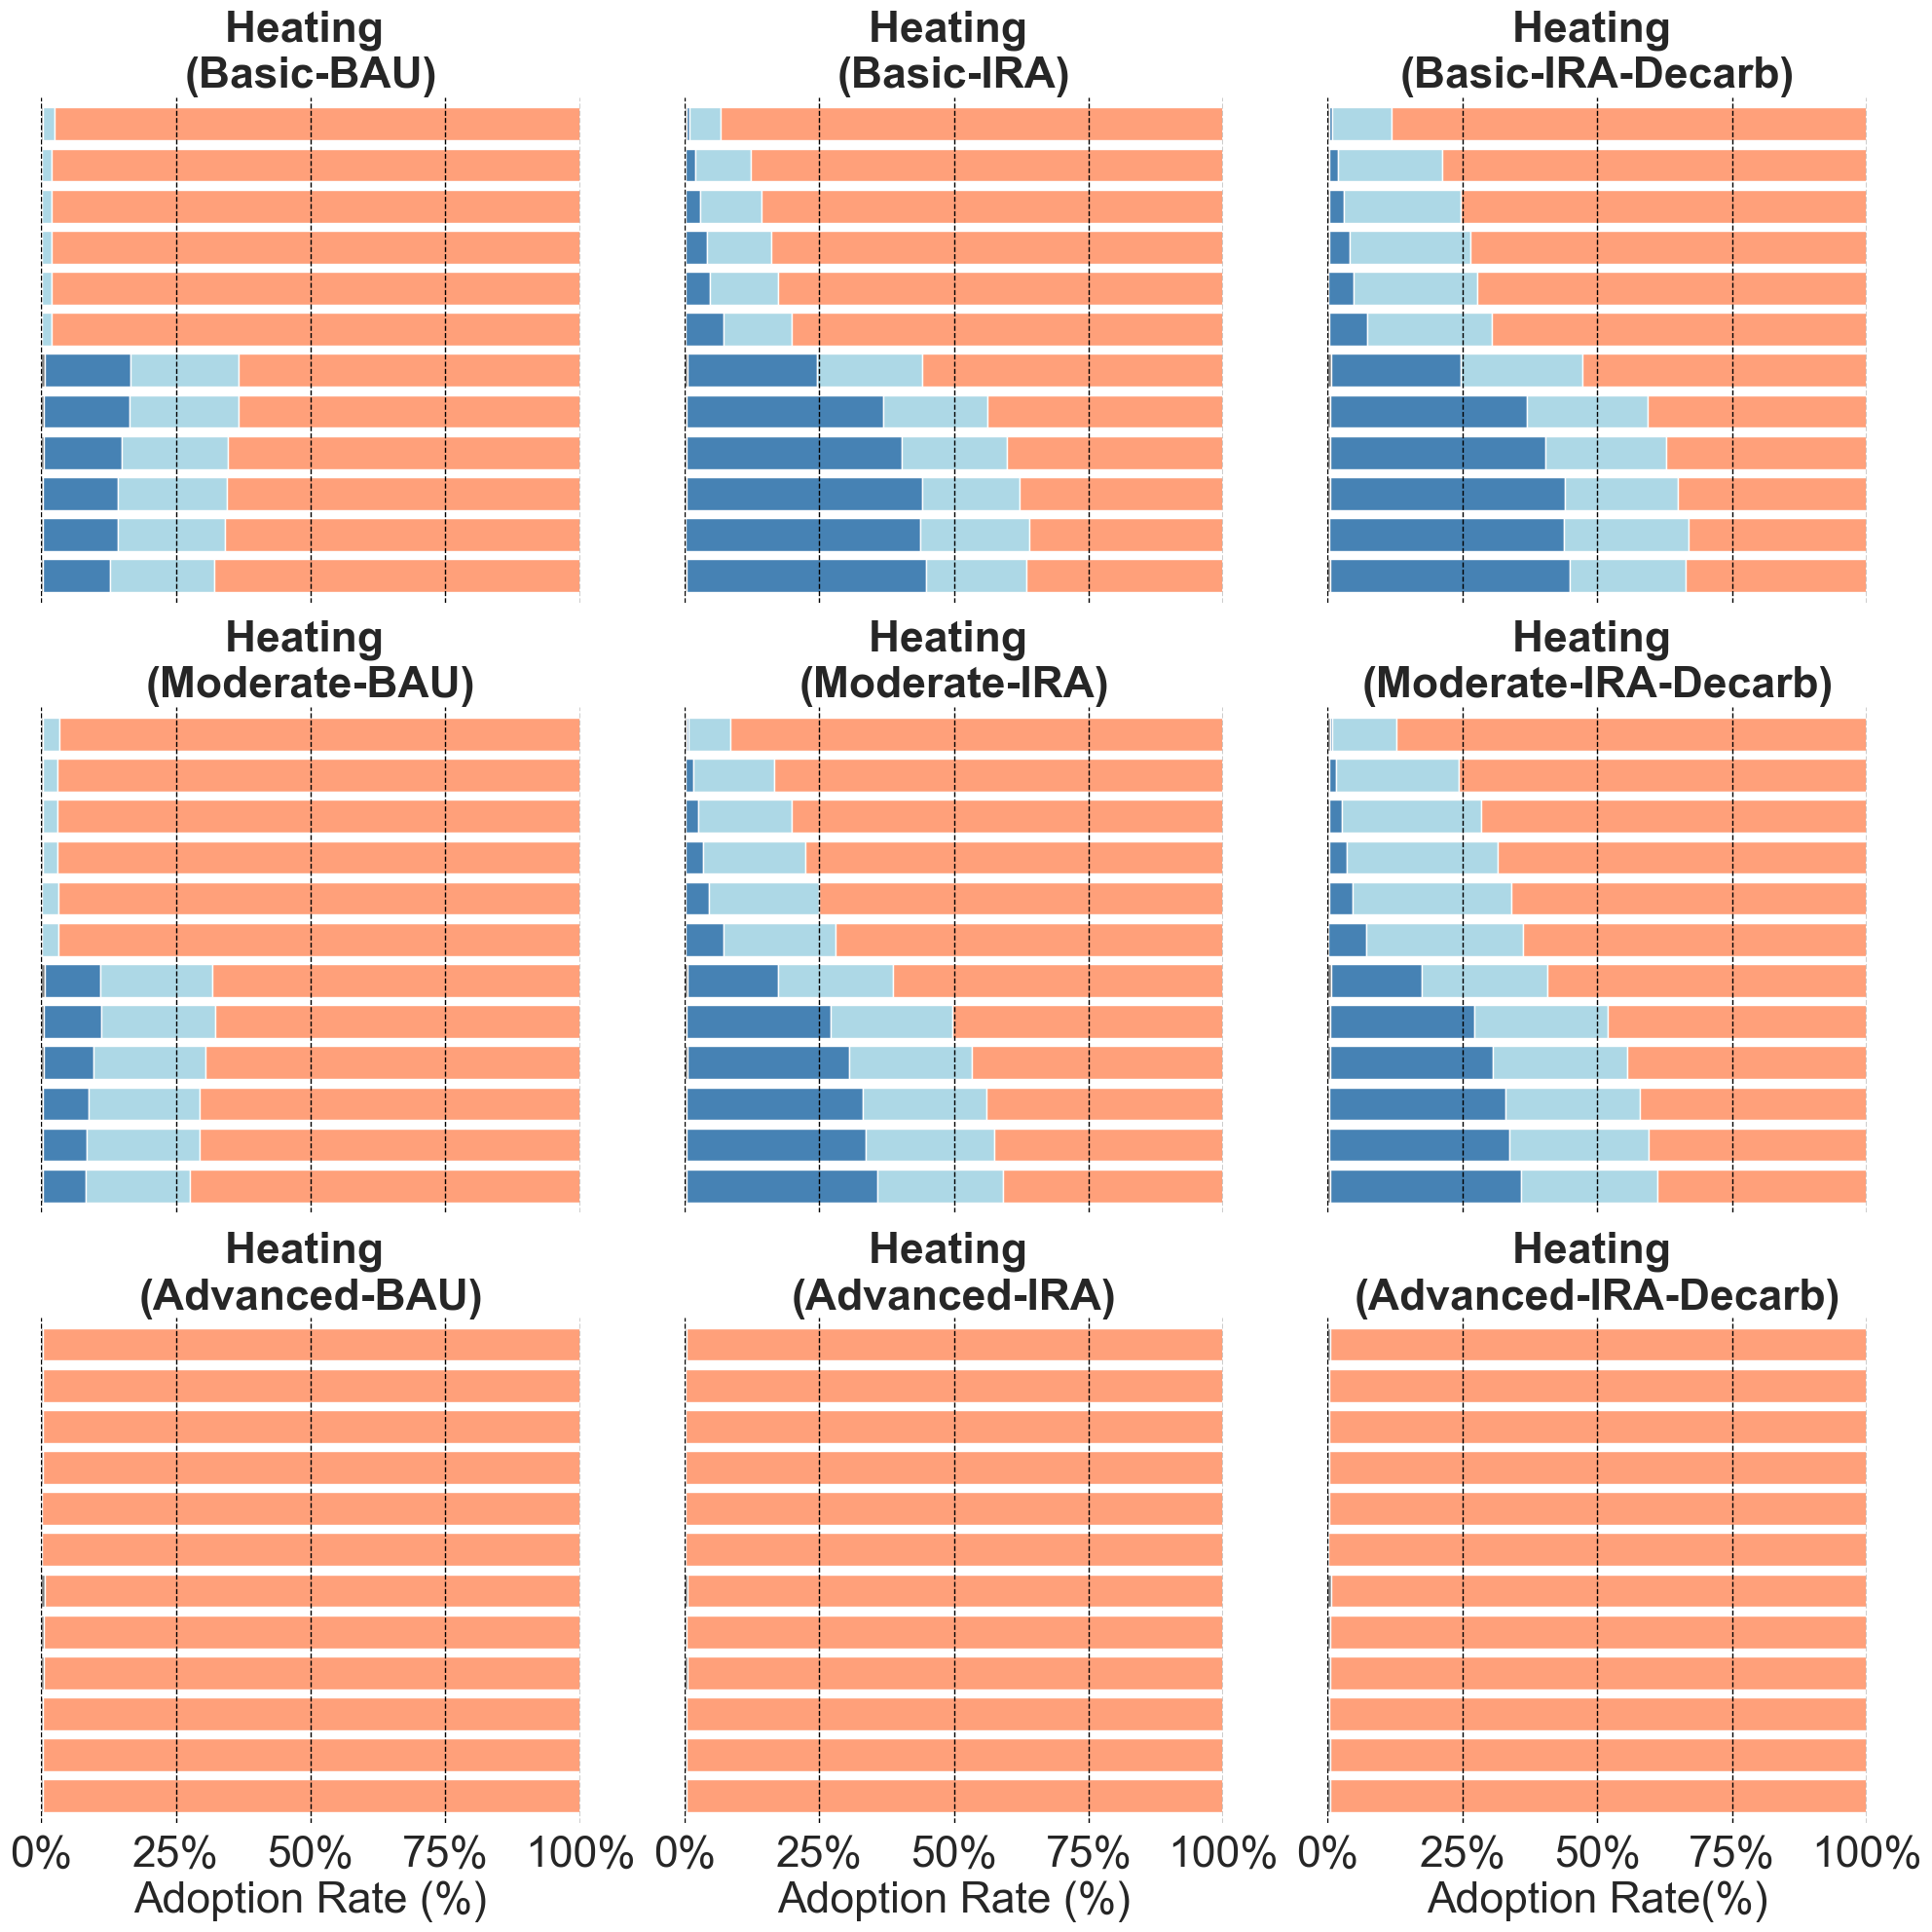

In [56]:
# REFERENCE COST SCENARIO
cost_assumption='reference'

subplot_grid_adoption_hBar_stacked(
    dataframes=[df_outputs_basic_heating, df_outputs_basic_heating, df_outputs_basic_heating,
                df_outputs_moderate_heating, df_outputs_moderate_heating, df_outputs_moderate_heating,
                df_outputs_advanced_heating, df_outputs_advanced_heating, df_outputs_advanced_heating],
    subplot_positions=[(0, 0), (0, 1), (0, 2),
                      (1, 0), (1, 1), (1, 2),
                      (2, 0), (2, 1), (2, 2)],
    x_cols=[f'mp8_heating_adoption', f'ira_mp8_heating_adoption', f'ira_gridDecarb_mp8_heating_adoption',
            f'mp9_heating_adoption', f'ira_mp9_heating_adoption', f'ira_gridDecarb_mp9_heating_adoption',
            f'mp10_heating_adoption', f'ira_mp10_heating_adoption', f'ira_gridDecarb_mp10_heating_adoption'],
    x_labels=['', '', '',
              '', '', '',
              'Adoption Rate (%)', 'Adoption Rate (%)', 'Adoption Rate(%)'],    
    y_labels=None,
    plot_titles=['Heating \n(Basic-BAU)', 'Heating \n(Basic-IRA)', 'Heating \n(Basic-IRA-Decarb)',
                 'Heating \n(Moderate-BAU)', 'Heating \n(Moderate-IRA)', 'Heating \n(Moderate-IRA-Decarb)',
                 'Heating \n(Advanced-BAU)', 'Heating \n(Advanced-IRA)', 'Heating \n(Advanced-IRA-Decarb)',],
    groups=2,
    groupby1='base_fuel',
    groupby2='federal_poverty_level',
    figure_size=(20, 20),  # Adjusted figure size
    sharex=True,
    sharey=True,
    rotate_landscape=False,
#     display_obs='percentage',
    filter_fuel=['Electricity', 'Natural Gas'],  # Apply the filter here
    export_filename='adoptionRate_heating_filter.png', 
    export_format='png',
    dpi=600
)

In [57]:
# REFERENCE COST SCENARIO
cost_assumption='reference'

print("""
----------------------------------------------------------
SPACE HEATING SCENARIOS: BASIC RETROFIT
----------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic-BAU | Basic-IRA | Basic-IRA-Decarb
----------------------------------------------------------""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_heating, df_outputs_basic_heating, df_outputs_basic_heating], 
    data_columns=[f'mp8_heating_adoption', f'ira_mp8_heating_adoption', f'ira_gridDecarb_mp8_heating_adoption'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='federal_poverty_level',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
----------------------------------------------------------
SPACE HEATING SCENARIOS: MODERATE RETROFIT
----------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Moderate-BAU | Moderate-IRA | Moderate-IRA-Decarb
----------------------------------------------------------""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_moderate_heating, df_outputs_moderate_heating, df_outputs_moderate_heating], 
    data_columns=[f'mp9_heating_adoption', f'ira_mp9_heating_adoption', f'ira_gridDecarb_mp9_heating_adoption'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='federal_poverty_level',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
----------------------------------------------------------
SPACE HEATING SCENARIOS: ADVANCED RETROFIT
----------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Advanced-BAU | Advanced-IRA | Advanced-IRA-Decarb
----------------------------------------------------------""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_advanced_heating, df_outputs_advanced_heating, df_outputs_advanced_heating], 
    data_columns=[f'mp10_heating_adoption', f'ira_mp10_heating_adoption', f'ira_gridDecarb_mp10_heating_adoption'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='federal_poverty_level',
#     filter_fuel=['Natural Gas', 'Electricity']
)


----------------------------------------------------------
SPACE HEATING SCENARIOS: BASIC RETROFIT
----------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic-BAU | Basic-IRA | Basic-IRA-Decarb
----------------------------------------------------------
('Overall'): AD 7.4%, PAS 11.2%, TAS 18.7% | AD 17.5%, PAS 13.8%, TAS 31.2% | AD 17.5%, PAS 19.5%, TAS 37.0%
('Electricity', '0-100%'): AD 12.5%, PAS 19.3%, TAS 31.8% | AD 44.6%, PAS 18.6%, TAS 63.2% | AD 44.6%, PAS 21.7%, TAS 66.3%
('Electricity', '100-150%'): AD 14.0%, PAS 19.9%, TAS 33.9% | AD 43.6%, PAS 20.3%, TAS 63.8% | AD 43.6%, PAS 23.2%, TAS 66.8%
('Electricity', '150-200%'): AD 14.0%, PAS 20.3%, TAS 34.2% | AD 43.8%, PAS 18.2%, TAS 62.0% | AD 43.8%, PAS 21.1%, TAS 64.9%
('Electricity', '200-300%'): AD 14.5%, PAS 19.9%, TAS 34.3% | AD 40.0%, PAS 19.5%, TAS 59.5% | AD 40.0%, PAS 22.6%, TAS 62.7%
('Electricity

In [58]:
df_outputs_basic_waterHeating

,bldg_id,square_footage,census_region,building_america_climate_zone,cambium_GEA_region,state,city,county,puma,county_and_puma,weather_file_city,Longitude,Latitude,building_type,income,federal_poverty_level,occupancy,tenure,vacancy_status,base_heating_fuel,heating_type,hvac_cooling_type,vintage,base_heating_efficiency,base_electricity_heating_consumption,base_fuelOil_heating_consumption,base_naturalGas_heating_consumption,base_propane_heating_consumption,base_waterHeating_fuel,waterHeating_type,base_electricity_waterHeating_consumption,base_fuelOil_waterHeating_consumption,base_naturalGas_waterHeating_consumption,base_propane_waterHeating_consumption,base_clothesDrying_fuel,base_electricity_clothesDrying_consumption,base_naturalGas_clothesDrying_consumption,base_propane_clothesDrying_consumption,base_cooking_fuel,base_electricity_cooking_consumption,base_naturalGas_cooking_consumption,base_propane_cooking_consumption,baseline_heating_consumption,baseline_waterHeating_consumption,baseline_clothesDrying_consumption,baseline_cooking_consumption,subregion_eGRID,naturalGas_leakage_factor,margSocialCosts_so2,margDamage_factor_so2,margSocialCosts_nox,margDamage_factor_nox,margSocialCosts_pm25,margDamage_factor_pm25,margSocialCosts_co2,margDamage_factor_co2,electricity_lookup_values,baseline_heating_damages_so2,baseline_heating_damages_nox,baseline_heating_damages_pm25,baseline_heating_damages_co2,baseline_heating_damages_health,baseline_heating_damages_climate,baseline_waterHeating_damages_so2,baseline_waterHeating_damages_nox,baseline_waterHeating_damages_pm25,baseline_waterHeating_damages_co2,baseline_waterHeating_damages_health,baseline_waterHeating_damages_climate,baseline_clothesDrying_damages_so2,baseline_clothesDrying_damages_nox,baseline_clothesDrying_damages_pm25,baseline_clothesDrying_damages_co2,baseline_clothesDrying_damages_health,baseline_clothesDrying_damages_climate,baseline_cooking_damages_so2,baseline_cooking_damages_nox,baseline_cooking_damages_pm25,baseline_cooking_damages_co2,baseline_cooking_damages_health,baseline_cooking_damages_climate,region_merge,fuel_type_heating,fuel_type_waterHeating,fuel_type_clothesDrying,fuel_type_cooking,fuelPrice_electricity_perkWh,fuelPrice_naturalGas_perkWh,fuelPrice_propane_perkWh,fuelPrice_fuelOil_perkWh,baseline_heating_fuelCost,baseline_waterHeating_fuelCost,baseline_clothesDrying_fuelCost,baseline_cooking_fuelCost,hvac_has_ducts,baseline_heating_type,hvac_heating_efficiency,hvac_heating_type_and_fuel,size_heat_pump_backup_primary_k_btu_h,size_heating_system_primary_k_btu_h,size_heating_system_secondary_k_btu_h,upgrade_hvac_heating_efficiency,water_heater_efficiency,water_heater_fuel,water_heater_in_unit,size_water_heater_gal,upgrade_water_heater_efficiency,clothes_dryer_in_unit,upgrade_clothes_dryer,cooking_range_in_unit,upgrade_cooking_range,mp8_heating_consumption,mp8_waterHeating_consumption,mp8_clothesDrying_consumption,mp8_cooking_consumption,mp8_heating_reduction_consumption,mp8_heating_change_consumption,mp8_heating_percentChange_consumption,mp8_waterHeating_reduction_consumption,mp8_waterHeating_change_consumption,mp8_waterHeating_percentChange_consumption,mp8_clothesDrying_reduction_consumption,mp8_clothesDrying_change_consumption,mp8_clothesDrying_percentChange_consumption,mp8_cooking_reduction_consumption,mp8_cooking_change_consumption,mp8_cooking_percentChange_consumption,mp8_heating_damages_so2,mp8_heating_reduction_damages_so2,mp8_heating_damages_nox,mp8_heating_reduction_damages_nox,mp8_heating_damages_pm25,mp8_heating_reduction_damages_pm25,mp8_heating_damages_co2,mp8_heating_reduction_damages_co2,mp8_heating_damages_health,mp8_heating_damages_climate,mp8_heating_reduction_damages_health,mp8_heating_reduction_damages_climate,mp8_waterHeating_damages_so2,mp8_waterHeating_reduction_damages_so2,mp8_waterHeating_damages_nox,mp8_waterHeating_reduction_damages_nox,mp8_waterHeating_damages_pm25,mp8_waterHeating_reduction_damages_pm25,mp8_waterHeating_damages_co2,mp8_w

### Reference Costs Scenario: EVERYTHING BUT HVAC
- REFERENCE is NREL REMDB 90th Percentile (High)
- We also do not account for state or local utility rebates/incentives so these cost assumptions are reasonable

**Cost Assumption Parameter**

cost_assumption='reference'

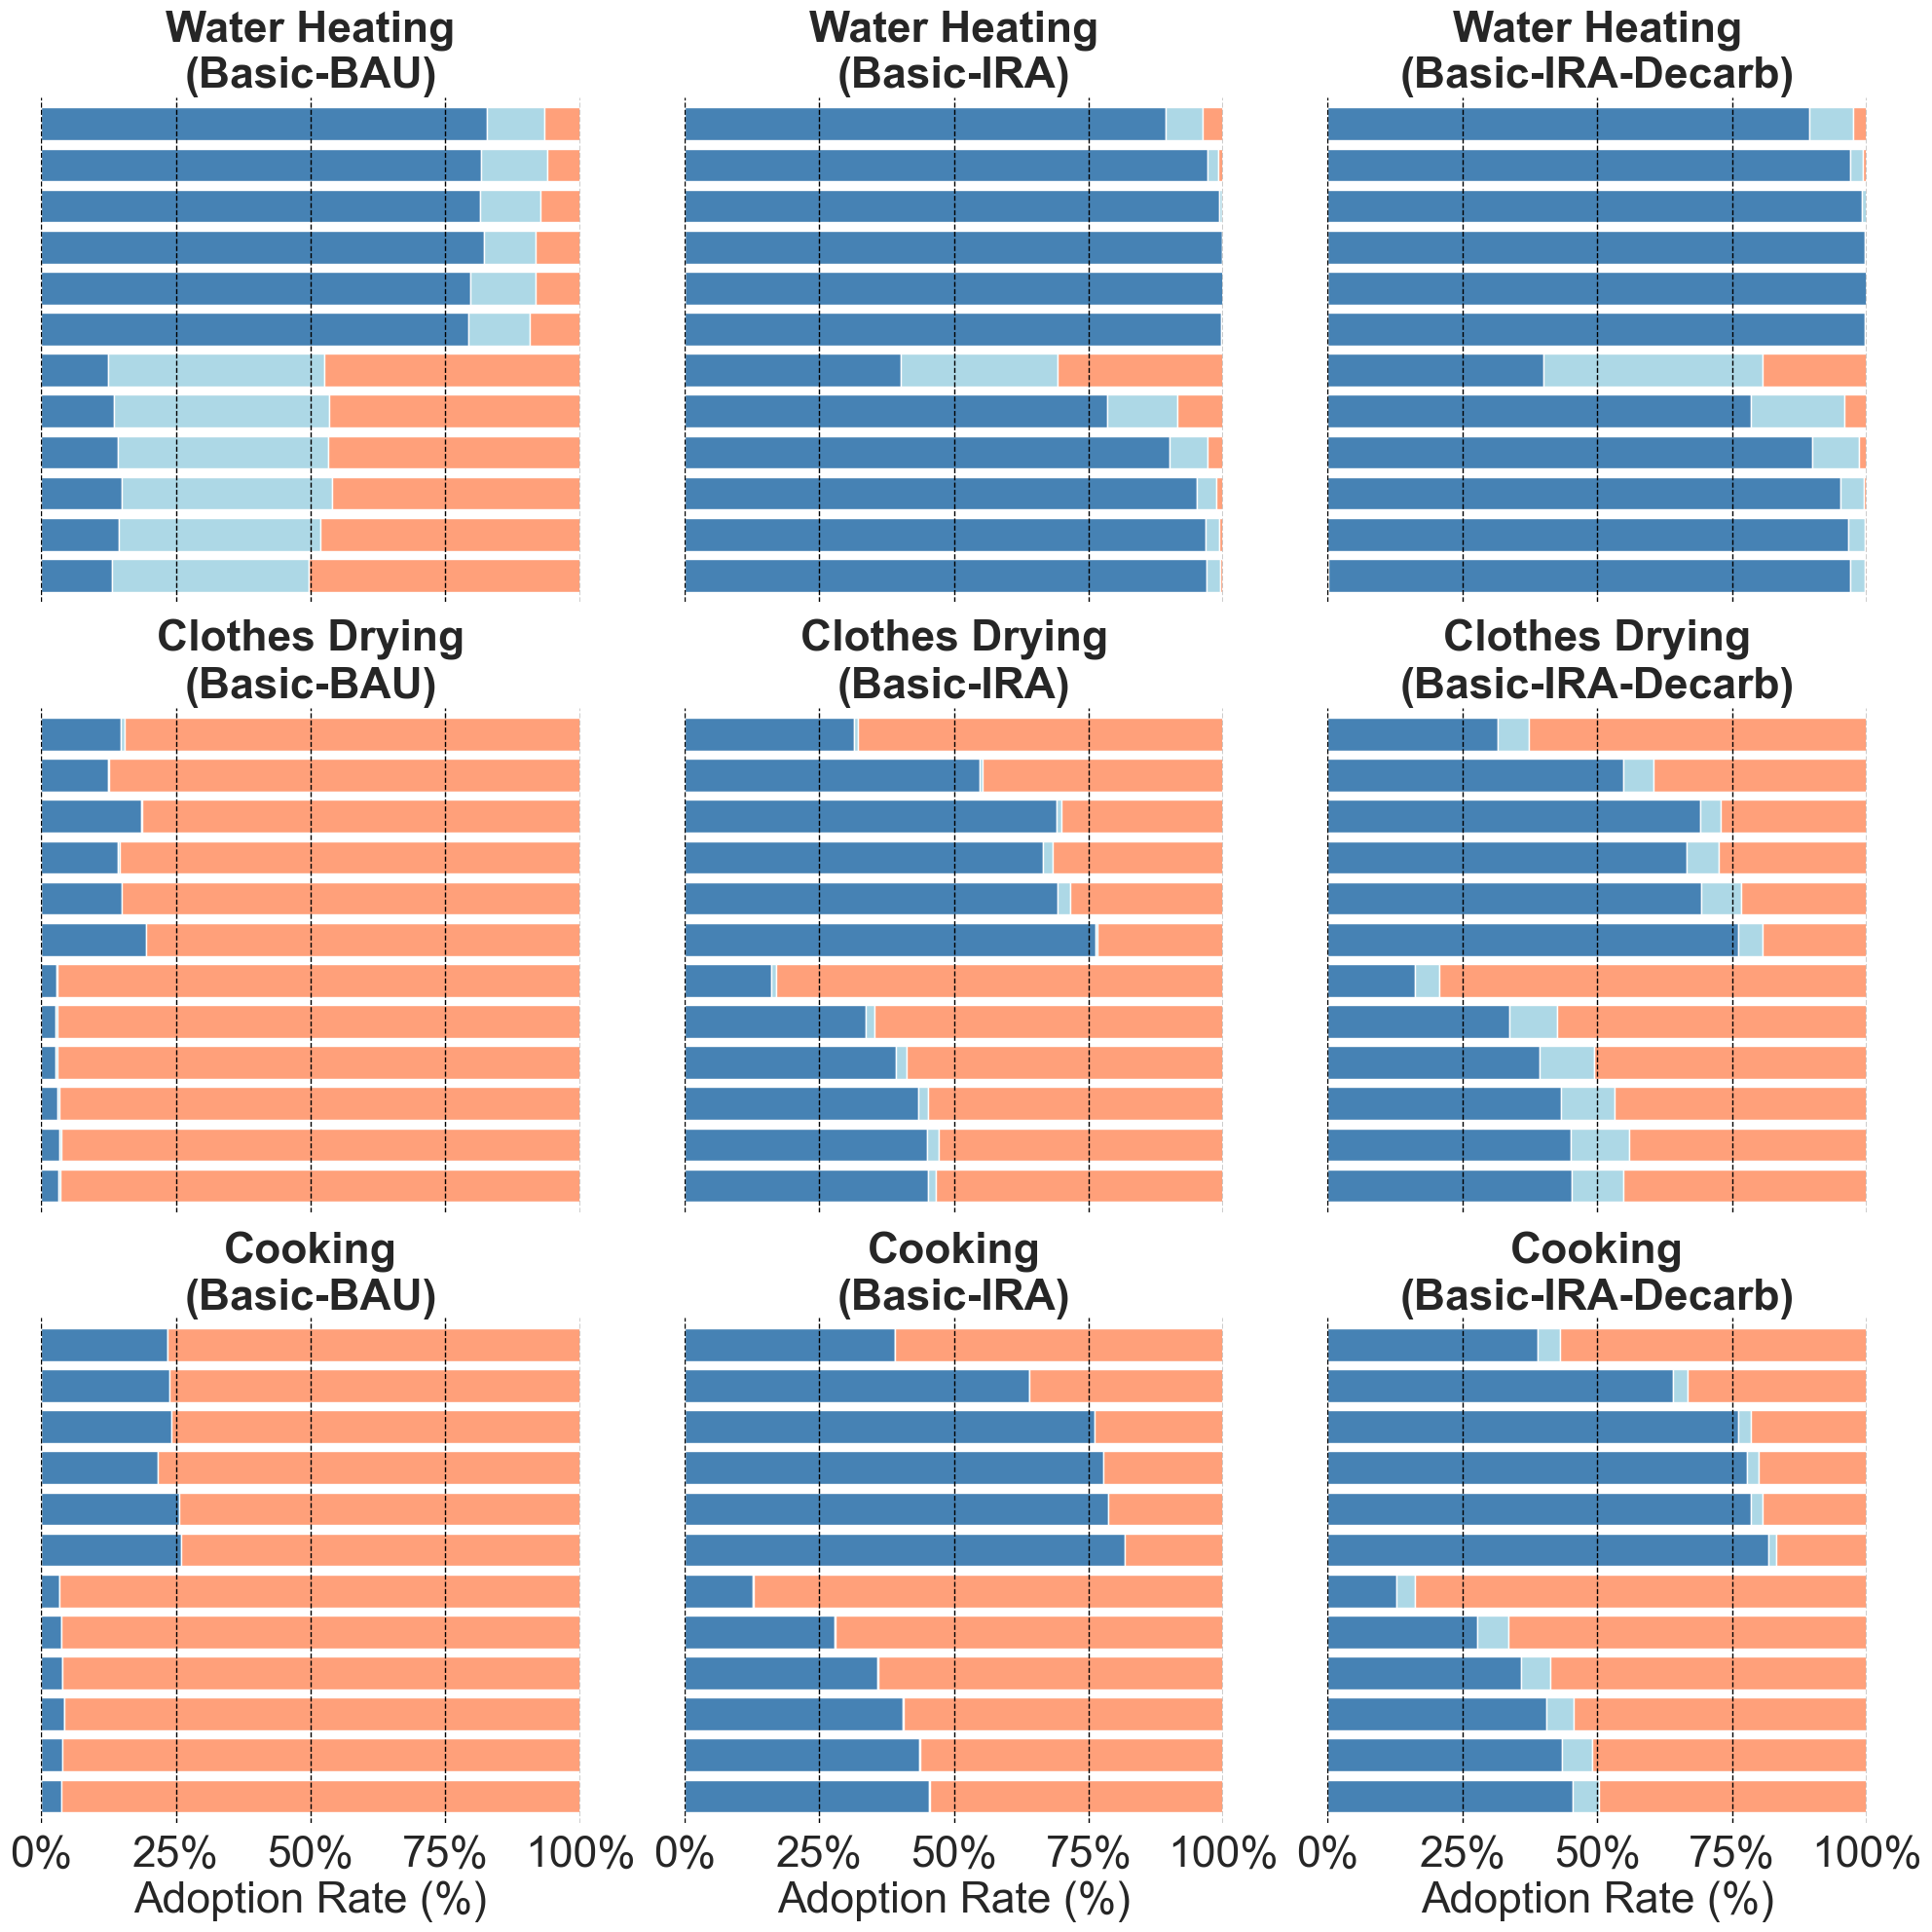

In [59]:
# REFERENCE COST SCENARIO
cost_assumption='reference'

subplot_grid_adoption_hBar_stacked(
    dataframes=[df_outputs_basic_waterHeating, df_outputs_basic_waterHeating, df_outputs_basic_waterHeating,
                df_outputs_basic_clothesDrying, df_outputs_basic_clothesDrying, df_outputs_basic_clothesDrying,
                df_outputs_basic_cooking, df_outputs_basic_cooking, df_outputs_basic_cooking],
    subplot_positions=[(0, 0), (0, 1), (0, 2),
                      (1, 0), (1, 1), (1, 2),
                      (2, 0), (2, 1), (2, 2)],
    x_cols=[f'mp8_waterHeating_adoption', f'ira_mp8_waterHeating_adoption', f'ira_gridDecarb_mp8_waterHeating_adoption',
            f'mp8_clothesDrying_adoption', f'ira_mp8_clothesDrying_adoption', f'ira_gridDecarb_mp8_clothesDrying_adoption',
            f'mp8_cooking_adoption', f'ira_mp8_cooking_adoption', f'ira_gridDecarb_mp8_cooking_adoption',],
    x_labels=['', '', '',
              '', '', '',
              'Adoption Rate (%)', 'Adoption Rate (%)', 'Adoption Rate (%)'],    
    y_labels=None,
    plot_titles=['Water Heating\n(Basic-BAU)', 'Water Heating\n(Basic-IRA)', 'Water Heating\n(Basic-IRA-Decarb)',
                 'Clothes Drying\n(Basic-BAU)', 'Clothes Drying\n(Basic-IRA)', 'Clothes Drying\n(Basic-IRA-Decarb)',
                 'Cooking\n(Basic-BAU)', 'Cooking\n(Basic-IRA)', 'Cooking\n(Basic-IRA-Decarb)',],
    groups=2,
    groupby1='base_fuel',
    groupby2='federal_poverty_level',
    figure_size=(20, 20),  # Adjusted figure size
    sharex=True,
    sharey=True,
    rotate_landscape=False,
    filter_fuel=['Propane', 'Natural Gas'],  # Apply the filter here
    export_filename='adoptionRate_all_filter.png', 
    export_format='png',
#     display_obs='percentage',
    dpi=600
)

In [60]:
# REFERENCE COST SCENARIO
cost_assumption='reference'

print("""
----------------------------------------------------------
WATER HEATING SCENARIOS
----------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic-BAU | Basic-IRA | Basic-IRA-Decarb
----------------------------------------------------------""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_waterHeating, df_outputs_basic_waterHeating, df_outputs_basic_waterHeating], 
    data_columns=[f'mp8_waterHeating_adoption', f'ira_mp8_waterHeating_adoption', f'ira_gridDecarb_mp8_waterHeating_adoption'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='federal_poverty_level',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
----------------------------------------------------------
CLOTHES DRYING SCENARIOS
----------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic-BAU | Basic-IRA | Basic-IRA-Decarb
----------------------------------------------------------""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_clothesDrying, df_outputs_basic_clothesDrying, df_outputs_basic_clothesDrying], 
    data_columns=[f'mp8_clothesDrying_adoption', f'ira_mp8_clothesDrying_adoption', f'ira_gridDecarb_mp8_clothesDrying_adoption'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='federal_poverty_level',
#     filter_fuel=['Natural Gas', 'Electricity']
)

print("""
----------------------------------------------------------
COOKING SCENARIOS
----------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic-BAU | Basic-IRA | Basic-IRA-Decarb
----------------------------------------------------------""")
print_combined_adoption_decision_percentages(
    dataframes=[df_outputs_basic_cooking, df_outputs_basic_cooking, df_outputs_basic_cooking], 
    data_columns=[f'mp8_cooking_adoption', f'ira_mp8_cooking_adoption', f'ira_gridDecarb_mp8_cooking_adoption'], 
    groups=2, 
    groupby1='base_fuel', 
    groupby2='federal_poverty_level',
#     filter_fuel=['Natural Gas', 'Electricity']
)


----------------------------------------------------------
WATER HEATING SCENARIOS
----------------------------------------------------------
(Base Fuel, FPL): Adoption %, Potential Adoption with Subsidy %, Total Adoption with Additional Subsidy %
Scenarios: Basic-BAU | Basic-IRA | Basic-IRA-Decarb
----------------------------------------------------------
('Overall'): AD 30.8%, PAS 36.6%, TAS 67.5% | AD 71.4%, PAS 16.9%, TAS 88.2% | AD 71.4%, PAS 21.0%, TAS 92.4%
('Electricity', '0-100%'): AD 39.4%, PAS 37.5%, TAS 76.9% | AD 96.4%, PAS 3.1%, TAS 99.4% | AD 96.4%, PAS 3.2%, TAS 99.6%
('Electricity', '100-150%'): AD 42.8%, PAS 36.1%, TAS 78.9% | AD 96.9%, PAS 2.5%, TAS 99.4% | AD 96.9%, PAS 2.6%, TAS 99.5%
('Electricity', '150-200%'): AD 47.7%, PAS 35.0%, TAS 82.7% | AD 96.7%, PAS 2.9%, TAS 99.6% | AD 96.7%, PAS 3.0%, TAS 99.7%
('Electricity', '200-300%'): AD 48.6%, PAS 35.5%, TAS 84.1% | AD 94.5%, PAS 5.0%, TAS 99.5% | AD 94.5%, PAS 5.1%, TAS 99.6%
('Electricity', '300-400%'): AD 48.7

# Model Runtime

In [61]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 19 minutes and 51 seconds to execute.


# Scatter Plot: Private vs Net NPV

In [62]:
# # REFERENCE is NREL REMDB 90th Percentile (High)
# cost_assumption='reference'

# subplot_grid_adoption_hBar_stacked
#     dataframes=[df_outputs_basic_heating, df_outputs_basic_heating, df_outputs_basic_heating,
#                 df_outputs_moderate_heating, df_outputs_moderate_heating, df_outputs_moderate_heating,
#                 df_outputs_advanced_heating, df_outputs_advanced_heating, df_outputs_advanced_heating,],
#     subplot_positions=[(0, 0), (0, 1), (0, 2),
#                       (1, 0), (1, 1), (1, 2),
#                       (2, 0), (2, 1), (2, 2)],
#     x_cols=[f'mp8_heating_adoption', f'ira_mp8_heating_adoption', f'ira_gridDecarb_mp8_heating_adoption',
#             f'mp9_heating_adoption', f'ira_mp9_heating_adoption', f'ira_gridDecarb_mp9_heating_adoption',
#             f'mp10_heating_adoption', f'ira_mp10_heating_adoption', f'ira_gridDecarb_mp10_heating_adoption'],
#     x_labels=['', '', '',
#               '', '', '',
#               'Adoption Rate (%)', 'Adoption Rate (%)', 'Adoption Rate(%)'],    
#     y_labels=None,
#     plot_titles=['Heating \n(Basic-BAU)', 'Heating \n(Basic-IRA)', 'Heating \n(Basic-IRA-Decarb)',
#                  'Heating \n(Moderate-BAU)', 'Heating \n(Moderate-IRA)', 'Heating \n(Moderate-IRA-Decarb)',
#                  'Heating \n(Advanced-BAU)', 'Heating \n(Advanced-IRA)', 'Heating \n(Advanced-IRA-Decarb)',],
#     groups=2,
#     groupby1='base_heating_fuel',
#     groupby2='federal_poverty_level',
#     figure_size=(20, 20),  # Adjusted figure size
#     sharex=True,
#     sharey=True,
#     rotate_landscape=False,
# #     display_obs='percentage',
#     filter_fuel=['Electricity', 'Natural Gas'],  # Apply the filter here
#     export_filename='adoptionRate_heating_filter.png', 
#     export_format='png',
#     dpi=600
# )

# Summary Table: 
# Subsidy Needed for Potential Adopters to Break-Even (Private NPV>0)

In [63]:
# # menu_mp=8

# # df_outputs_basic_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
# # df_outputs_basic_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
# # df_outputs_basic_waterHeating = load_scenario_data('Water Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
# # df_outputs_basic_clothesDrying = load_scenario_data('Clothes Drying', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})
# # df_outputs_basic_cooking = load_scenario_data('Cooking', output_folder_path, scenario_string, model_run_date_time, columns_to_string={16:str, 128:str})

# # # This creates a column in each dataframe for the specified end-use undergoing retrofit
# # # This is helpful because older functions can be used without undergoing major refactoring and testing

# # Heating End-use Category and Base Fuel Column
# df_outputs_basic_heating['end_use'] = 'heating'
# df_outputs_basic_heating['base_fuel'] = df_outputs_basic_home['base_heating_fuel']

# # Water Heating End-use Category and Base Fuel Column
# df_outputs_basic_waterHeating['end_use'] = 'waterHeating'
# df_outputs_basic_waterHeating['base_fuel'] = df_outputs_basic_home['base_waterHeating_fuel']

# # Clothes Drying End-use Category and Base Fuel Column
# df_outputs_basic_clothesDrying['end_use'] = 'clothesDrying'
# df_outputs_basic_clothesDrying['base_fuel'] = df_outputs_basic_home['base_clothesDrying_fuel']

# # Cooking End-use Category and Base Fuel Column
# df_outputs_basic_cooking['end_use'] = 'cooking'
# df_outputs_basic_cooking['base_fuel'] = df_outputs_basic_home['base_cooking_fuel']

In [64]:
# # End-use category
# category = 'heating'

# def subsidy_filter(df):
#     keep_columns = [col for col in df.columns if 'Adoption' in col[1] or 'Potential Adoption with Subsidy' in col[1] or 'Total Adoption with Subsidy' in col[1]]
#     return df.loc[:, keep_columns]


# # Create a new column that filters for just the potential adopters
# def calculate_potential_adopter_subsidy(df, measure_packages, categories):
#     # Create a copy of the dataframe
#     df_copy = df.copy()
    
#     # Begin df with these cols
#     adoption_cols = ['bldg_id', 'federal_poverty_level', 'lowModerateIncome_designation', 'state', 'end_use', 'base_fuel']

#     columns = ['bldg_id', 'federal_poverty_level', 'lowModerateIncome_designation', 'state', 'end_use', 'base_fuel']

#     for mp in measure_packages:
#         for category in categories:
#             for cost_assumption in cost_assumptions:
#                 cols = [f'ira_gridDecarb_mp{menu_mp}_{category}_adoption',
#                         f'gridDecarb_mp{menu_mp}_{category}_public_npv',
#                         f'ira_mp{menu_mp}_{category}_private_npv',
#                        ]
#                 columns.extend(cols)

#     df_copy = df_copy[columns]
    
#     # Filter DataFrame to keep relevant columns only
#     subsidy_filter = 
    
#     df_copy

               
                
# # Lifetime Summary Stats
# summarize_stats_table(df=df_outputs_basic_home,
#                       data_columns=[
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv',
#                           f'ira_mp{menu_mp}_{category}_private_npv',
#                           f'mp{menu_mp}_{category}_net_npv',
#                           f'ira_mp{menu_mp}_{category}_net_npv',
#                           f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv'
#                       ],
#                       column_name_mapping={                         
#                           f'mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} BAU Heating Public NPV [$USD]',
#                           f'gridDecarb_mp{menu_mp}_{category}_public_npv': f'MP{menu_mp} IRA-Decarb Heating Public NPV [$USD]',                          
#                           f'mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} BAU Heating Private NPV [$USD]',
#                           f'ira_mp{menu_mp}_{category}_private_npv': f'MP{menu_mp} IRA Heating Private NPV [$USD]',
#                           f'mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} BAU Heating Net NPV [$USD]',
#                           f'ira_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA Heating Net NPV [$USD]',                          
#                           f'ira_gridDecarb_mp{menu_mp}_{category}_net_npv': f'MP{menu_mp} IRA-Decarb Heating Net NPV [$USD]',                                                   
#                       },
#                       number_formatting='0.2f',
#                       include_zero=False
#                      )

In [65]:
# def calculate_potential_adopter_subsidy(df, menu_mp, category):
#     # Create a copy of the dataframe
#     df_copy = df.copy()
    
#     # Define the initial columns to keep
#     columns = ['bldg_id', 'federal_poverty_level', 'lowModerateIncome_designation', 'state', 'end_use', 'base_fuel']

#     # Loop through each measure package, category, and cost assumption
#     for cost_assumption in cost_assumptions:
#         adoption_col = f'ira_gridDecarb_mp{menu_mp}_{category}_adoption'
#         public_npv_col = f'gridDecarb_mp{menu_mp}_{category}_public_npv'
#         private_npv_col = f'ira_mp{menu_mp}_{category}_private_npv'
        
#         # Add the dynamically named columns to the list
#         columns.extend([adoption_col, public_npv_col, private_npv_col])
    
#     # Create a filter column for the latest cost_assumption in the loop
#     subsidy_filter = df_copy[f'ira_gridDecarb_mp{menu_mp}_{category}_adoption_{cost_assumptions[-1]}'] == 'Potential Adoption with Subsidy'
    
#     # Apply the filter to the dataframe to select rows
#     df_copy = df_copy[subsidy_filter]

#     # Filter DataFrame to keep relevant columns only
#     df_copy = df_copy.loc[:, columns]
    
#     return df_copy

# # Use the function with example parameters
# df_mp8_subsidy_heating = calculate_potential_adopter_subsidy(df=df_outputs_basic_heating, menu_mp=8, category='heating'=['reference'])
# df_mp8_subsidy_heating

In [66]:
# def calculate_potential_adopter_subsidy(df, menu_mp, category):
#     # Create a copy of the dataframe
#     df_copy = df.copy()
    
#     # Define the initial columns to keep
#     columns = ['bldg_id', 'federal_poverty_level', 'lowModerateIncome_designation', 'state', 'end_use', 'base_fuel']

#     # Loop through each measure package, category, and cost assumption
#     for cost_assumption in cost_assumptions:
#         adoption_col = f'ira_gridDecarb_mp{menu_mp}_{category}_adoption'
#         public_npv_col = f'gridDecarb_mp{menu_mp}_{category}_public_npv'
#         private_npv_col = f'ira_mp{menu_mp}_{category}_private_npv'
        
#         # Add the dynamically named columns to the list
#         columns.extend([adoption_col, public_npv_col, private_npv_col])
    
#     # Create a filter column for the latest cost_assumption in the loop
#     subsidy_filter = df_copy[f'ira_gridDecarb_mp{menu_mp}_{category}_adoption_{cost_assumptions[-1]}'] == 'Potential Adoption with Subsidy'
    
#     # Apply the filter to the dataframe to select rows
#     df_copy = df_copy[subsidy_filter]

#     # Filter DataFrame to keep relevant columns only
#     df_copy = df_copy.loc[:, columns]
    
#     return df_copy

# # Use the function with example parameters
# df_mp8_subsidy_heating = calculate_potential_adopter_subsidy(df=df_outputs_basic_heating, menu_mp=8, category='heating'=['reference'])
# df_mp8_subsidy_heating

# Adoption Rate Stacked Bar
## Heating: All 9 Scenarios with Varied Cost Assumptions
## Water Heating, Clothes Drying, and Cooking: Basic Retrofit, Varied Cost Assumptions

In [67]:
import pandas as pd

def create_df_adoption(df, menu_mp, category):
    """
    Generates a new DataFrame with specific adoption columns based on provided parameters.
    
    Args:
    df (pd.DataFrame): Original DataFrame.
    menu_mp (int): Measure package identifier.
    category (str): Category of adoption to analyze.
    cost_params (list of str): List of cost assumption types.

    Returns:
    pd.DataFrame: A DataFrame with the selected columns.
    """    
    # Create a copy of the dataframe
    df_copy = df.copy()
    
    # Define the mapping for income designations
    income_mapping = {
        'Low-Income': 'LMI',
        'Moderate-Income': 'LMI',
        'Middle-to-Upper-Income': 'MUI'
    }
    
    # Map the 'lowModerateIncome_designation' column using the income_mapping
    df_copy['lowModerateIncome_designation'] = df_copy['lowModerateIncome_designation'].map(income_mapping)
    
    # Begin df with these cols
    adoption_cols = ['bldg_id', 'federal_poverty_level', 'lowModerateIncome_designation', 'state', 'end_use', 'base_fuel',
                     f'mp{menu_mp}_{category}_adoption', f'ira_mp{menu_mp}_{category}_adoption', f'ira_gridDecarb_mp{menu_mp}_{category}_adoption']
        
    df_copy = df_copy[adoption_cols]
    
    return df_copy

In [68]:
# All Dataframes: All Enduses, Basic/Moderate/Advanced Retrofit, Cost Assumptions
# Heating
df_basic_adoption_heating = create_df_adoption(df_outputs_basic_heating, 8, 'heating')
df_moderate_adoption_heating = create_df_adoption(df_outputs_moderate_heating, 9, 'heating')
df_advanced_adoption_heating = create_df_adoption(df_outputs_advanced_heating, 10, 'heating')

# Water Heating
df_basic_adoption_waterHeating = create_df_adoption(df_outputs_basic_waterHeating, 8, 'waterHeating')
df_moderate_adoption_waterHeating = create_df_adoption(df_outputs_moderate_waterHeating, 9, 'waterHeating')
df_advanced_adoption_waterHeating = create_df_adoption(df_outputs_advanced_waterHeating, 10, 'waterHeating')

# Clothes Drying
df_basic_adoption_clothesDrying = create_df_adoption(df_outputs_basic_clothesDrying, 8, 'clothesDrying')
df_moderate_adoption_clothesDrying = create_df_adoption(df_outputs_moderate_clothesDrying, 9, 'clothesDrying')
df_advanced_adoption_clothesDrying = create_df_adoption(df_outputs_advanced_clothesDrying, 10, 'clothesDrying')

# Cooking
df_basic_adoption_cooking = create_df_adoption(df_outputs_basic_cooking, 8, 'cooking')
df_moderate_adoption_cooking = create_df_adoption(df_outputs_moderate_cooking, 9, 'cooking')
df_advanced_adoption_cooking = create_df_adoption(df_outputs_advanced_cooking, 10, 'cooking')

In [69]:
import pandas as pd

def filter_columns(df):
    keep_columns = [col for col in df.columns if 'Adoption' in col[1] or 'Potential Adoption with Subsidy' in col[1] or 'Total Adoption with Subsidy' in col[1]]
    return df.loc[:, keep_columns]

def create_multiIndex_adoption_df(df, menu_mp, category):
    # Explicitly set 'lowModerateIncome_designation' as a categorical type with order
    income_categories = ['LMI', 'MUI']
    df['lowModerateIncome_designation'] = pd.Categorical(df['lowModerateIncome_designation'], categories=income_categories, ordered=True)
    
    # Define the columns for adoption data
    adoption_cols = [f'mp{menu_mp}_{category}_adoption', 
                     f'ira_mp{menu_mp}_{category}_adoption',
                     f'ira_gridDecarb_mp{menu_mp}_{category}_adoption'
                     ]

    # Group by 'base_fuel' and 'lowModerateIncome_designation', calculate normalized counts
    percentages_df = df.groupby(['base_fuel', 'lowModerateIncome_designation'], observed=False)[adoption_cols].apply(
        lambda x: x.apply(lambda y: y.value_counts(normalize=True))).unstack().fillna(0) * 100
    percentages_df = percentages_df.round(2)

    # Create 'Total Adoption with Subsidy' by combining related columns
    for column in adoption_cols:
        percentages_df[(column, 'Total Adoption with Subsidy')] = percentages_df[(column, 'Adoption')] + percentages_df.get((column, 'Potential Adoption with Subsidy'), 0)

    # Rebuild the column MultiIndex
    percentages_df.columns = pd.MultiIndex.from_tuples(percentages_df.columns)
    
    # Filter DataFrame to keep relevant columns only
    filtered_df = filter_columns(percentages_df)

    # No need to set the index as categorical here again since it's already defined
    # Specify new column order
    new_order = []
    for prefix in ['mp', 'ira_mp', 'ira_gridDecarb_mp']:
        new_order.extend([
            (f'{prefix}{menu_mp}_{category}_adoption', 'Adoption'),
            (f'{prefix}{menu_mp}_{category}_adoption', 'Potential Adoption with Subsidy'),
            (f'{prefix}{menu_mp}_{category}_adoption', 'Total Adoption with Subsidy'),
            ])

    # Reorder columns based on new_order
    filtered_df = filtered_df.loc[:, pd.MultiIndex.from_tuples(new_order)]

    # Sort DataFrame by the entire index
    filtered_df.sort_index(level=['base_fuel', 'lowModerateIncome_designation'], inplace=True)

    return filtered_df

# # Usage example (assuming df_basic_adoption_heating is properly formatted and loaded):
# df_multiIndex_heating_adoption = create_multiIndex_adoption_df(df_basic_adoption_heating, 8, 'heating', ['reference'])
# df_multiIndex_heating_adoption

In [70]:
# SPACE HEATING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_heating_adoption = create_multiIndex_adoption_df(df_basic_adoption_heating, 8, 'heating')
df_multiIndex_moderate_heating_adoption = create_multiIndex_adoption_df(df_moderate_adoption_heating, 9, 'heating')
df_multiIndex_advanced_heating_adoption = create_multiIndex_adoption_df(df_advanced_adoption_heating, 10, 'heating')

# WATER HEATING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_waterHeating_adoption = create_multiIndex_adoption_df(df_basic_adoption_waterHeating, 8, 'waterHeating')
df_multiIndex_moderate_waterHeating_adoption = create_multiIndex_adoption_df(df_moderate_adoption_waterHeating, 9, 'waterHeating')
df_multiIndex_advanced_waterHeating_adoption = create_multiIndex_adoption_df(df_advanced_adoption_waterHeating, 10, 'waterHeating')

# CLOTHES DRYING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_clothesDrying_adoption = create_multiIndex_adoption_df(df_basic_adoption_clothesDrying, 8, 'clothesDrying')
df_multiIndex_moderate_clothesDrying_adoption = create_multiIndex_adoption_df(df_moderate_adoption_clothesDrying, 9, 'clothesDrying')
df_multiIndex_advanced_clothesDrying_adoption = create_multiIndex_adoption_df(df_advanced_adoption_clothesDrying, 10, 'clothesDrying')

# COOKING: MULTI-INDEX DATAFRAMES
df_multiIndex_basic_cooking_adoption = create_multiIndex_adoption_df(df_basic_adoption_cooking, 8, 'cooking')
df_multiIndex_moderate_cooking_adoption = create_multiIndex_adoption_df(df_moderate_adoption_cooking, 9, 'cooking')
df_multiIndex_advanced_cooking_adoption = create_multiIndex_adoption_df(df_advanced_adoption_cooking, 10, 'cooking')

KeyError: ('mp10_heating_adoption', 'Adoption')

In [ ]:
def subplot_grid_adoption_vBar(dataframes, scenarios_list, subplot_positions, filter_fuel=None, x_labels=None, plot_titles=None, y_labels=None, suptitle=None, figure_size=(12, 10), sharex=False, sharey=False):
    """
    Creates a grid of subplots to visualize adoption rates across different scenarios, with an option to plot specific data related to adoption.

    Parameters:
    - dataframes (list of pd.DataFrame): List of pandas DataFrames, each DataFrame is assumed to be formatted for use in plot_adoption_rate_bar.
    - scenarios_list (list of list): List of scenarios corresponding to each DataFrame.
    - subplot_positions (list of tuples): Positions of subplots in the grid, specified as (row, col) tuples.
    - filter_fuel (list of str, optional): List of fuel types to filter the DataFrames by 'base_fuel' column in a multi-index.
    - x_labels (list of str, optional): Labels for the x-axis of each subplot.
    - plot_titles (list of str, optional): Titles for each subplot.
    - y_labels (list of str, optional): Labels for the y-axis of each subplot.
    - suptitle (str, optional): A central title for the entire figure.
    - figure_size (tuple, optional): Size of the entire figure (width, height) in inches.
    - sharex (bool, optional): Whether subplots should share the same x-axis.
    - sharey (bool, optional): Whether subplots should share the same y-axis.

    Returns:
    None. Displays the figure based on the provided parameters.
    """
    num_subplots = len(subplot_positions)
    num_cols = max(pos[1] for pos in subplot_positions) + 1
    num_rows = max(pos[0] for pos in subplot_positions) + 1

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figure_size, sharex=sharex, sharey=sharey)
    axes = np.array(axes).reshape(num_rows, num_cols)  # Ensure axes is always 2D

    for idx, (df, scenarios) in enumerate(zip(dataframes, scenarios_list)):
        # Apply the filter_fuel if provided
        if filter_fuel:
            df = df.loc[(df.index.get_level_values('base_fuel').isin(filter_fuel)), :]
        
        pos = subplot_positions[idx]
        ax = axes[pos[0], pos[1]]
        x_label = x_labels[idx] if x_labels else ""
        y_label = y_labels[idx] if y_labels else ""
        title = plot_titles[idx] if plot_titles else ""

        plot_adoption_rate_bar(df, scenarios, title, x_label, y_label, ax)

    if suptitle:
        plt.suptitle(suptitle, fontweight='bold')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to leave space for the suptitle
    plt.show()

def plot_adoption_rate_bar(df, scenarios, title, x_label, y_label, ax):
    # Assume the DataFrame 'df' has a suitable structure, similar to earlier examples
    adoption_data = df.loc[:, df.columns.get_level_values(1).isin(['Adoption', 'Potential Adoption with Subsidy'])]
    adoption_data.columns = adoption_data.columns.remove_unused_levels()

    # Define the color mapping as specified
    color_mapping = {
        'Adoption': 'steelblue',
        'Potential Adoption with Subsidy': 'lightblue'
    }

    # Plotting logic
    n = len(adoption_data.index)
    bar_width = 0.25  # Width of bars
    index = list(range(n))  # Base index for bars

    for scenario in scenarios:
        if (scenario, 'Adoption') in adoption_data.columns and (scenario, 'Potential Adoption with Subsidy') in adoption_data.columns:
            adoption = adoption_data[scenario, 'Adoption'].values
            potential_adoption = adoption_data[scenario, 'Potential Adoption with Subsidy'].values
            ax.bar(index, adoption, bar_width, color=color_mapping['Adoption'], bottom=0, edgecolor='white')
            ax.bar(index, potential_adoption, bar_width, color=color_mapping['Potential Adoption with Subsidy'], bottom=adoption, edgecolor='white')
            index = [i + bar_width for i in index]

    ax.set_xlabel(x_label, fontweight='bold', fontsize=20)
    ax.set_ylabel(y_label, fontweight='bold', fontsize=20)
    ax.set_title(title, fontweight='bold', fontsize=20)
    ax.set_xticks([i + bar_width / 2 for i in range(n)])
    ax.set_xticklabels([f'{name[0]} - {name[1]}' for name in adoption_data.index.tolist()], rotation=90, ha='right')

    # Set font size for tick labels on the x-axis
    ax.tick_params(axis='x', labelsize=20)

    # Set font size for tick labels on the y-axis
    ax.tick_params(axis='y', labelsize=20)

In [ ]:
# SPACE HEATING - ALL 3 SCENARIOS
scenarios_lists = [
    ['mp8_heating_adoption', 'ira_mp8_heating_adoption', 'ira_gridDecarb_mp8_heating_adoption'],
    ['mp9_heating_adoption', 'ira_mp9_heating_adoption', 'ira_gridDecarb_mp9_heating_adoption'],
    ['mp10_heating_adoption', 'ira_mp10_heating_adoption', 'ira_gridDecarb_mp10_heating_adoption']
]

titles = [
    "BASIC RETROFIT:\nBAU | IRA | IRA-Decarb", "MODERATE RETROFIT:\nBAU | IRA | IRA-Decarb", "ADVANCED RETROFIT:\nBAU | IRA | IRA-Decarb", 
]

# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_heating_adoption, 
                df_multiIndex_moderate_heating_adoption, 
                df_multiIndex_advanced_heating_adoption,
               ],
    scenarios_list=scenarios_lists,
    subplot_positions=[(i // 3, i % 3) for i in range(9)],
    x_labels=["", "", "",
              "", "", "",
              "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)", ""
             ],
    plot_titles=titles,
    y_labels=["Space Heating Retrofit\n Adoption Rate (%)", "", "",
              "Space Heating Retrofit\n Adoption Rate (%)", "", "",
              "Space Heating Retrofit\n Adoption Rate (%)", "", ""
             ],
    figure_size=(20,20),
    sharex=True,
    sharey=True,
#     filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)

In [ ]:
# SPACE HEATING - ALL 9 SCENARIOS
scenarios_lists = [
    ['mp8_waterHeating_adoption', 'ira_mp8_waterHeating_adoption', 'ira_gridDecarb_mp8_waterHeating_adoption'],
    ['mp8_clothesDrying_adoption', 'ira_mp8_clothesDrying_adoption', 'ira_gridDecarb_mp8_clothesDrying_adoption'],
    ['mp8_cooking_adoption', 'ira_mp8_cooking_adoption', 'ira_gridDecarb_mp8_cooking_adoption'],
]

titles = [
    "PROGRESSIVE COST ASSUMPTIONS:\nBasic: BAU | IRA | IRA-Decarb", "REFERENCE COST ASSUMPTIONS:\nBasic: BAU | IRA | IRA-Decarb", "CONSERVATIVE COST ASSUMPTIONS:\nBasic: BAU | IRA | IRA-Decarb", 
]

# Function call remains as before
subplot_grid_adoption_vBar(
    dataframes=[df_multiIndex_basic_waterHeating_adoption, df_multiIndex_basic_waterHeating_adoption, df_multiIndex_basic_waterHeating_adoption,
                df_multiIndex_basic_clothesDrying_adoption, df_multiIndex_basic_clothesDrying_adoption, df_multiIndex_basic_clothesDrying_adoption,
                df_multiIndex_basic_cooking_adoption, df_multiIndex_basic_cooking_adoption, df_multiIndex_basic_cooking_adoption
               ],
    scenarios_list=scenarios_lists,
    subplot_positions=[(i // 3, i % 3) for i in range(9)],
    x_labels=["", "", "",
              "", "", "",
              "", "Household Income Designation and Baseline Fuel (Pre-Retrofit)", ""
             ],
    plot_titles=titles,
    y_labels=["Water Heating Retrofit\n Adoption Rate (%)", "", "",
              "Clothes Drying Retrofit\n Adoption Rate (%)", "", "",
              "Cooking Retrofit\n Adoption Rate (%)", "", ""
             ],
    figure_size=(20,20),
    sharex=True,
    sharey=True,
    filter_fuel=['Natural Gas', 'Electricity', 'Propane']
)